<img src="images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Entanglement Purification: The BBPSSW Protocol
***


## Summary and Outline
***
In this tutorial we demonstrate the use of IBM Qiskit by implementing entanglement purification. This technique from quantum information processing, which is especially required for quantum communication, allows to generate highly-entangled qubit pairs from noisy sources. In the purification protocol presented below, we will use two entangled qubit pairs to create a single pair with an increased amount of entanglement.

In **Part I** we will first give a very brief introduction to entanglement purification itself. We present the necessary details to this topic in a depth, so that we understand the following implementation in Qiskit with this knowledge.

In **Part II** we give a detailed description of how to implement the entanglement purification protocol in Qiskit. We focus on explaining the necessary steps in detail and providing a comprehensive description of the use of Qiskit. The presented contents include the creation of quantum circuits from single- and two-qubit gates, the implementation of quantum measurements and the visualization of quantum circuits. Furthermore, we present how to use the tomography functions integrated in Qiskit to perform quantum state tomography, which is necessary to demonstrate the functioning of entanglement purification.

After we have generated the quantum circuit for entanglement purification, we will perform a simulation of this circuit with the built-in quantum simulator of Qiskit in **Part III**. We show how the density matrix of the qubit pair for which we want to increase the entanglement can be reconstructed step by step from the simulation results. In order to verify the correctness of our Qiskit implementation of the purification protocol, we compare the simulation results with exact calculations.

The simulation in Part III is based on a perfect quantum computer. In **Part IV** we extend this simulation and account for imperfections in the setup. Through the IBM Q Experience, we will read the properties of a real IBM Q device, such as gate and measurement accuracy, and relaxation and decoherence rates. From these properties we will show how to create a simple noise model with the help of integrated Qiskit functions, which can then be used in the simulation. From the simulation results, we will again reconstruct the density matrix of our entangled qubit pair and we can gain a first impression of how well purification could work on a real device.

Finally, in **Part V**, we will run the purification protocol on a real IBM Q device. We show how to access such a device through the IBM Q Experience and execute the quantum circuit for entanglement purification that we have previously constructed. As in the previous parts, we will reconstruct the density matrix of the real qubit pair and check whether the entanglement can be increased.

In the last part, **Part VI**, we will summarize our results and propose further steps that could logically extend this tutorial.


## Learning Objectives
***

We give a comprehensive explanation of the following basic features of Qiskit and the IBM Q Experience:

* Composition of quantum circuits from single- and two-qubit gates
* Generation of parametrized quantum circuits
* Implementation of qubit measurements
* Execution of quantum circuits using the simulator integrated in Qiskit
* Execution of quantum circuits on real IBM Q devices using the IBM Q Experience
* Extraction of measurement results

In addition, we explain more advanced uses of Qiskit and the topics are:

* Performance of quantum state tomography
* Postprocession of measurement results for conditional quantum state tomography
* Extraction of noise parameters from real devices using the IBM Q Experience
* Creation of simple noise models
* Simulation of noisy systems using Qiskit's integrated simulator
* Calculation of an ensemble average over many quantum systems

We also give an introduction to entanglement purification and explain the associated quantum protocol, which we will implement step by step in Qiskit. However, our main focus is on the use of Qiskit and we refer readers interested in in-depth explanations of entanglement purification to the references we provide.


## Prior Knowledge
***

To understand the tutorial, the following topics from the field of quantum information theory are required:

* Common single- and two-qubit gates
* Qubit entanglement or the notion of maximal entanglement
* Bell states
* Mixed quantum states and density matrices
* Quantum state fidelity

The following topics are helpful, but not absolutely necessary, to work through this tutorial:

* Quantum state tomography

Since this tutorial is provided as Jupyter notebook, basic knowledge of the following Python libraries is recommended:

* NumPy


## Contents
***
* **Part I: Introduction to Entanglement Purification and the BBPSSW Protocol**
  * 1.1 Concept
  * 1.2 Quantum Protocol
  
  
* **Part II: Implementation of Quantum Circuit for BBPSSW Protocol in Qiskit**
  * 2.1 Basic Code Imports
  * 2.2 Definitions
  * 2.3 Quantum Register and Quantum Circuit
    * 2.3.1 Quantum Register
    * 2.3.2 Circuit for Initialization of Source State
    * 2.3.3 Implementation of Twirl Operation by Random Bilateral Rotation
    * 2.3.4 Exchange of $|\Psi^-\rangle$ and $|\Phi^+\rangle$ Components
    * 2.3.5 Application of Bilateral CNOT Gate
    * 2.3.6 Concatenation of Quantum Circuits
  * 2.4 (Conditional) Quantum State Tomography
  
  
* **Part III: Simulation of the BBPSSW Protocol using Qiskit**
   * 3.1 Single Quantum System
   * 3.2 Ensemble Average
     * 3.2.1 Definition of Auxiliary Functions
     * 3.2.2 Simulation


* **Part IV: Including Noise in the Simulation Model**
  * 4.1 IBM Q Account
  * 4.2 Creation of Noise Model in Qiskit
  * 4.3 Simulation Including Noise
    * 4.3.1 Initial State and Initial Fidelity
    * 4.3.2 Entanglement Purification in the Presence of Noise


* **Part V: Entanglement Purification on a Real IBM Q Device**
  * 5.1 IBM Q Experience
    * 5.1.1 Device Queue, Job Status, and Job Monitor
    * 5.1.2 Personal Credits
  * 5.2 Initial State and Initial Fidelity
  * 5.3 Execution of the BBPSSW Protocol on a Real Device


* **Part VI: Conclusion and Further Ideas**

# Part I: Introduction to Entanglement Purification and the BBPSSW Protocol
***

## 1.1 Concept

The concept of **entanglement purification** was introduced by C. H. Bennett *et al.* [1]. Following the names of the authors, the original protocol is also called the **BBPSSW protocol**. The basic idea of entanglement purification is to create an (almost) maximally entangled Bell state by distilling entanglement from a larger number of qubit pairs that are not maximally entangled. For this reason, this concept is also referred to as **entanglement distillation**. Purification usually has to be performed by two remote parties, so only local operations, measurements and classical two-way communication are allowed for entanglement purification protocols. 

Many applications of quantum information processing, such as quantum teleportation [2a] or entanglement-based quantum cryptography [2b], use the maximally entangled *Bell states* $\{|\Phi^{\pm}\rangle, |\Psi^{\pm}\rangle\}$,

$$ |\Phi^{\pm}\rangle = \frac{1}{\sqrt{2}}(|00\rangle \pm |11\rangle), \\
|\Psi^{\pm}\rangle = \frac{1}{\sqrt{2}}(|01\rangle \pm |10\rangle). $$

The feasibility or security of these protocols depends on the "quality" of the available Bell states. However, real sources of entangled qubit pairs or real lossy quantum channels are very likely to produce imperfect Bell states due to preparation errors or imperfect qubit transmission. The aim of entanglement purification is to compensate for this loss in entanglement and restore a maximally entangled Bell state. That is why entanglement purification is also a fundamental component of a quantum repeater [2c].

At the beginning we assume a source $S$ of entangled qubit pairs, which generates two-qubit states $\rho_\textrm{S}$ with some **state fidelity** $F$ towards the maximally-entangled Bell state $|\Psi^-\rangle$,

$$
F = \langle \Psi^- | \rho_\textrm{S} | \Psi^- \rangle.
$$

As already mentioned, imperfection can be caused by the production process itself or by the transmission of the qubits via lossy quantum channels.

The two parties that each have one of the qubits of the source state $\rho_\textrm{S}$ are usually called Alice and Bob. The whole scenario is shown in the following figure:

<img vspace="30">
<img src="images/fig01.png" width="400" vspace="30">

The basic idea of the BBPSSW protocol is that Alice and Bob take two copies of the state $\rho_\textrm{S}$ and perform certain quantum operations locally on their qubits to finally generate a single two-qubit state with larger fidelity $F' > F$. When this is achieved, the process can be iterated to produce even larger fidelities until a maximally entangled Bell state $| \Psi^- \rangle$ is obtained. 

In the following section we will explain the BBPSSW protocol step by step and show how Alice and Bob can increase the entanglement of the state $\rho_\textrm{S}$.

## 1.2 Quantum Protocol

### Step 1: Creation of a Werner State through Random Bilateral Rotation

From the two-qubit source state $\rho_\textrm{S}$ the two parties Alice and Bob must first create a so-called **Werner state** $W_F$,

$$
W_F = F |\Psi^-\rangle \langle \Psi^-| + \frac{1-F}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Phi^+\rangle \langle \Phi^+|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$

Such a state is diagonal in the Bell basis $\{ |\Phi^{+}\rangle, |\Phi^{-}\rangle, |\Psi^{+}\rangle, |\Psi^{-}\rangle \}$, has a fidelity of $F$ towards the Bell state $|\Psi^-\rangle$, and overlaps equally with the other three Bell states by $(1-F)/3$. 

Alice and Bob can achieve this by applying a so-called **twirl** operation [2] that keeps the $|\Psi^-\rangle$ component of the state $\rho_\textrm{S}$, balances the components of the other three Bell states, and removes all off-diagonal elements. A twirl can be implemented by bilateral operations $B_k (k \in \{x, y, z\})$ that rotate each qubit of the pair by an angle of $\pi/2$ around the $k$ axis. A random selection from the following set $\{ U_i \}$ of 12 combinations of bilateral rotations $B_k$,

$$
\{U_i\}
=
\{
I, \\ B_x B_x, \\ B_y B_y, \\ B_z B_z, \\
B_x B_y, \\ B_y B_z, \\ B_z B_x, \\ B_y B_x, 
\\ B_x B_y B_x B_y, \\ B_y B_z B_y B_z, \\ B_z B_x B_z B_x, \\ B_y B_x B_y B_x
\},  
$$  

transforms the state $\rho_\textrm{S}$ into the arithmetic average

$$
W_F = \frac{1}{12} \sum_{i=1}^{12} U_i^\dagger \rho_\textrm{S} U_i,
$$

which will be exactly the desired Werner state $W_F$. Here $I$ denotes the identity operation. An intuitive explanation of the twirl, which comes from molecular physics, can be found in Ref. [2] and is left to the interested reader.

Since Alice and Bob randomly select an operation from the set $\{ U_i \}$ in a realistic quantum communication scenario, we will also randomly select such an operation in the later implementation in Qiskit. In order to obtain the arithmetic average, we will have to perform several runs of the purification protocol.

We summarize the quantum operations performed locally by Alice and Bob in a graphical illustration for the sake of clarity:

<img vspace="30">
<img src="images/fig02.png" width="1000" vspace="30">

Here Alice's and Bob's qubit are referred to as $q_A$ and $q_B$, and $U_{i, A(B)}$ denotes Alice's (Bob's) single-qubit part of the randomly selected operation $U_i$.

### Step 2: Exchange of $|\Psi^-\rangle$ and $|\Phi^+\rangle$ Components

After Alice and Bob have prepared the state $W_F$, one of the parties rotates its qubit by an angle of $\pi$ around the $y$ axis, which corresponds to using a $Y$ gate,

$$
Y = 
\begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}.
$$

The result of such a unilateral rotation is that the components of $|\Psi^-\rangle$ and $|\Phi^+\rangle$ are exchanged in the Werner state $W_F$. Therefore, the operation creates a state $\rho_F$,

$$
\rho_F = F |\Phi^+\rangle \langle \Phi^+| + \frac{1-F}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Psi^-\rangle \langle \Psi^-|+|\Phi^-\rangle \langle \Phi^-|\right), 
$$  

where total phases were omitted in this representation. Without loss of generality, we assume that Alice performs this unilateral rotation, so that the quantum circuit of the protocol up to this point looks like this:

<img vspace="30">
<img src="images/fig03.png" width="1000" vspace="30">


### Step 3: Application of Bilateral CNOT Gate

Now that Alice and Bob can prepare the states $\rho_F$ from the source states $\rho_\textrm{S}$, they will use two copies of $\rho_F$ to increase the entanglement of one of these copies. In the first step, the two parties must apply a so-called bilateral CNOT gate to the two qubit pairs $\rho_F$.

A bilateral CNOT gate means that Alice and Bob each apply a CNOT gate to the two qubits they have locally available. The qubit from the first pair serves as the control qubit in the local CNOT operation, while the corresponding qubit from the second pair serves as the target qubit. Remember: In a CNOT gate, the state of the target qubit is flipped if and only if the control qubit is in the state $|1\rangle$.

If we now consider all four qubits from the two source qubit pairs $\rho_\textrm{S}$, the local quantum circuits of Alice and Bob look like this:

<img vspace="30">
<img src="images/fig04.png" width="1000" vspace="30">

Here we have denoted Alice's (Bob's) control qubit $q_{A(B),c}$ and the corresponding target qubit $q_{A(B),t}$.

### Step 4: Measurement of Target Qubits

In the second step, Alice and Bob measure the target qubits $q_{A,t}$ and $q_{B,t}$ in the computational basis $\{|0\rangle, |1\rangle \}$:

<img vspace="30">
<img src="images/fig05.png" width="1000" vspace="0">

After performing the measurements, Alice and Bob compare their measurement results. If both measurement results are the same, i.e. the target qubits were projected into state $|00\rangle$ or $|11\rangle$, the purification was successful and the control qubits are retained. Otherwise they will be discarded. 

To see that the purification process is successful exactly in this case, one must calculate the fidelity $F'$ of the resulting state of the control qubits, which we will call $\rho'_{F'}$,

$$
F' = \langle \Phi^+ | \rho'_{F'}| \Phi^+ \rangle.
$$

Note that the state $\rho'_{F'}$ does not have the same form as $\rho_{F}$, which is why we chose this notation. We will not elaborate on the calculation of $\rho'_{F'}$ in this introduction, as it is not required for the implementation in Qiskit, but only provide the result for $F'$[1],

$$
F' \equiv F'(F) = \langle \Phi^+ | \rho'_{F'}| \Phi^+ \rangle = \frac{F^2 + \frac{1}{9}(1-F)^2}{F^2 + \frac{2}{3}F(1-F) + \frac{5}{9}(1-F)^2}.
$$

Since the function $F'(F)$ is required at several points in this tutorial, we define the corresponding function `output_fidelity`:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def output_fidelity(F_in):
    """ Returns output fidelity of BBPSSW protocol.
    
    Keyword arguments:
    F_in -- input fidelity
    """
    F_out = (np.square(F_in) + np.square(1-F_in)/9) \
            / (np.square(F_in) + 2*F_in*(1-F_in)/3 + 5*np.square(1-F_in)/9)
 
    return F_out

The output fidelity $F'$ is larger than the input fidelity for $1/2 < F < 1$, which you can see very well when plotting the function $F'(F)$:

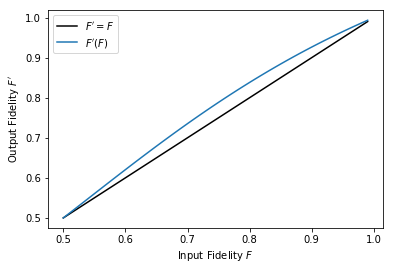

In [3]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

So, if the input fidelity $F$ of the source state $\rho_\textrm{S}$ is larger than 1/2, Alice and Bob can distill entanglement from two copies of that state and increase the fidelity of one of those copies. The two parties can then use two qubit pairs whose fidelity has already been increased to create another qubit pair with even higher fidelity, and so on. By iterating the procedure of the BBPSSW protocol described above, the fidelity of a two-qubit state can thus be brought arbitrarily close to 1, which in turn corresponds to a maximally-entangled Bell state.

### Step 5: Restoration of Werner State

Note that the state $\rho'_{F'}$ does not usually have the form of $\rho_{F}$, i.e. it can contain off-diagonal elements in the Bell basis and the components of $|\Phi^{-}\rangle$, $|\Psi^{+}\rangle$ and $|\Psi^{-}\rangle$ differ in size. But in order to perform a subsequent purification round, we must bring $\rho'_{F'}$ into the form of $\rho_{F}$, i.e. we must create something like a state $\rho_{F'}$,

$$
\rho_{F'} = F' |\Phi^+\rangle \langle \Phi^+| + \frac{1-F'}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Psi^-\rangle \langle \Psi^-|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$  

This can be achieved by performing the above steps backwards again. In the state $\rho'_{F'}$, the components of $|\Psi^-\rangle$ and $|\Phi^+\rangle$ are first swapped again by a unilateral $Y$ gate (see step 2). Then another twirl operation is performed to create a Werner state $W_{F'}$,

$$
W_{F'} = F' |\Psi^-\rangle \langle \Psi^-| + \frac{1-F'}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Phi^+\rangle \langle \Phi^+|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$

This state $W_{F'}$ can now serve as the initial state for a new round of entanglement purification, , since we can easily create the state $\rho_{F'}$ from it.

In the following implementation in Qiskit we will shorten the purification protocol and omit this fifth step. We only want to do a single purification round here and therefore do not convert the output state $\rho'_{F'}$ of the control qubits back to the Werner form $W_{F'}$ after the target qubits have been measured. Instead, we will directly evaluate the fidelity of the control qubits to the Bell state $| \Phi^+ \rangle$,

$$
\langle \Phi^+ | \rho'_{F'}| \Phi^+ \rangle = F' = \langle \Psi^- | W_{F'}| \Psi^- \rangle,
$$

because we know the twirl operation leaves the $|\Psi^- \rangle$ component unchanged.

Herewith we finish the introductory part and turn to the implementation in Qiskit. We will explain in detail how steps 1 - 4 described above can be implemented in Qiskit to determine the state $\rho'_{F'}$ and calcutate the final $F'$ fidelity.

# Part II: Implementation of Quantum Circuit for BBPSSW Protocol in Qiskit
***

## 2.1 Basic Code Imports

To use Qiskit in this initial part of the tutorial in which we create a quantum circuit for the BBPSSW protocol, we must first import the necessary base code from the Qiskit module:

In [4]:
# import Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# import Parameter class
from qiskit.circuit import Parameter

We also need the external library `deepcopy` and use the constant $\pi$ from the `math` library:

In [6]:
from copy import deepcopy
from math import pi

## 2.2 Definitions

As described in **Part I**, to demonstrate entanglement purification, the fidelity of quantum states towards a maximally-entangled Bell state must be calculated. This calculation is later performed with an integrated Qiskit function that returns the fidelity between two states when specified as numpy arrays. 

We therefore define the four Bell states in the basis $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$ as numpy arrays:

In [7]:
phi_plus = np.array([1, 0, 0, 1])/np.sqrt(2)   # | Phi^+ >
phi_minus = np.array([1, 0, 0, -1])/np.sqrt(2) # | Phi^- >
psi_plus = np.array([0, 1, 1, 0])/np.sqrt(2)   # | Psi^+ >
psi_minus = np.array([0, 1, -1, 0])/np.sqrt(2) # | Psi^- >

We will also have to check later how well we can initialize a Werner state $W_F$. For this we define a function `Werner_state` which returns a numpy array corresponding to a Werner state with a given fidelity $F$:

In [8]:
def Werner_state(F):
    """Returns Werner state of fidelity F.
    
    Keyword arguments:
    F -- fidelity of Werner state, range [0, 1]
    """
    if F < 0 or F > 1:
        raise Exception('Fidelity must be between 0 and 1.')
    
    state = F*np.outer(psi_minus, psi_minus.conj().T) \
    + (1 - F)/3*(np.outer(phi_plus, phi_plus.conj().T) \
                         + np.outer(phi_minus, phi_minus.conj().T) \
                         + np.outer(psi_plus, psi_plus.conj().T))
    
    return state

## 2.3 Quantum Register and Quantum Circuit

This section describes how to implement the quantum circuit for entanglement purififcation in Qiskit. For a better understanding, we divide the quantum circuit into its individual parts according to the individual steps in **Part I**. This means that we first simulate the source of the entangled qubits to create two qubits in the source state $\rho_\textrm{S}$. We then integrate steps 1 (random bilateral rotation) to 3 (bilateral CNOT gate) individually. Step 4 (measurement of target qubits) will then be dealt with separately later, as the implementation is a little trickier here.


### 2.3.1 Quantum Register

The BBPSSW protocol works with two entangled qubit pairs. In order to implement this protocol, we therefore need a quantum register consisting of four qubits on which our quantum circuit to be defined runs.

In Qiskit a quantum register is an instance of the class `QuantumRegister` and we can create a register with four qubits in the following way:

In [9]:
qr = QuantumRegister(4)

### 2.3.2 Circuit for Initialization of Source State

First of all we have to create qubit pairs in the state $\rho_\textrm{S}$. Our goal at the beginning is therefore to simulate the source $S$, which produces entangled qubits in the state $\rho_\textrm{S}$, which have an initial fidelity $F > 1/2$. Remember that such a high fidelity is required for the purification protocol to work.

To achieve this, we will implement a quantum circuit that creates the following state $|\psi_\textrm{S} \rangle$ between two qubits,

$$
|\psi_\textrm{S}\rangle = \cos\left(\frac{\theta}{2}\right) |01\rangle - \sin\left(\frac{\theta}{2}\right) |10\rangle ,
$$

where the two amplitudes are parametrized by an angle $\theta$ ($- \pi/2 < \theta < \pi/2$). From the state vector $|\psi_\textrm{S} \rangle$ we can then calculate the density matrix $\rho_\textrm{S} = |\psi_\textrm{S}\rangle\langle \psi_\textrm{S}|$,

$$
\rho_\textrm{S} = |\psi_\textrm{S}\rangle\langle \psi_\textrm{S} |
=
\cos^2\left(\frac{\theta}{2}\right) |01\rangle \langle 01|
-
\cos\left(\frac{\theta}{2}\right)\sin\left(\frac{\theta}{2}\right) 
\left( |01\rangle\langle 10| + |10\rangle\langle 01| \right)
+
\sin^2\left(\frac{\theta}{2}\right) |10\rangle \langle 10|.
$$

The fidelity of $\rho_\textrm{S}$ towards the Bell state $| \Psi^- \rangle$, which corresponds to the initial fidelity $F$, is then given by

$$
F \equiv F(\theta) = \langle \Psi^- | \rho_\textrm{S} | \Psi^- \rangle  = \frac{1}{2} \left( \sin(\theta) + 1 \right).
$$

We define a function `F_to_theta`, which returns the angle $\theta$ for a given fidelity $F$, since we will need this calculation several times in the tutorial:

In [10]:
def F_to_theta(F):
    """Returns the angle theta corresponding to an input Fidelity F.
    
    Keyword arguments:
    F -- fidelity between 0 and 1
    """
    if F < 0 or F > 1:
        raise Exception('Keyword argument must be between 0 and 1.')
    else:
        theta = np.arcsin(2*F - 1)
    
    return theta

In Qiskit quantum circuits are objects of the `QuantumCircuit` class. We can create a quantum circuit on our quantum register `qr` by creating an instance of the `QuantumCircuit` class in the following way:

In [11]:
source_circ = QuantumCircuit(qr)

The quantum circuit `source_circ` shall finally generate two pairs of qubits in the state $|\psi_\textrm{S}\rangle$ in the quantum register `qr`, but is so far an empty quantum circuit, because we have not introduced quantum gates yet. With the method `draw` quantum circuits can be visualized nicely and we can get a better picture of what our circuit does:

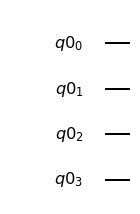

In [12]:
source_circ.draw(output='mpl')

We can see how the quantum register `qr` is constructed from the four qubits $q0_0$ to $q0_3$. (q0 is actually the name of the register itself.) Note that the qubit label starts with index 0 according to the indexing in Python.

We will create a source state $|\psi_\textrm{S}\rangle$ between qubits $q0_0$ (qubit 0) and $q0_1$ (qubit 1) and between qubits $q0_2$ (qubit 2) and $q0_3$ (qubit 3). Qubit 0 and qubit 1 should serve as control qubits, while the target qubits are qubit 2 and qubit 3. If we compare this with the representation in the introductory **Part I**, we find the following correspondences:

| Qubit  | Notation  | Notation in Qiskit  |
|:-:|:-:|:-:|
| Control qubit Alice  |  $q_{A,c}$ | $q0_0$  | 
| Control qubit Bob  |  $q_{B,c}$ | $q0_1$  |
| Target qubit Alice  |  $q_{A,t}$ | $q0_2$  |
| Target qubit Bob  |  $q_{B,t}$ | $q0_3$  |

The following shows how to set the control pair to $|\psi_\textrm{S}\rangle$. The implementation for the target pair is left as an exercise.

By default, all qubits are initialized to the state $|0\rangle$, i.e. the state $|\psi_\textrm{control}\rangle$ of the control pair is 

$$
|\psi_\textrm{control}\rangle = |0\rangle_{0} |0\rangle_{1},
$$

where the index is to denote the corresponding qubit. As first step we flip qubit 1 using a Pauli-$X$ gate,

$$
X = 
\begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}.
$$

In Qiskit a Pauli-$X$ gate can be implemented in a quantum circuit with the method `x` of the class`QuantumCircuit`:

In [13]:
source_circ.x(qr[1]);

Every qubit $i$ in the register can be called with `qr[i]`. So `x(qr[1])` implements an $X$ gate on qubit 1. If we draw the quantum circuit again, we see that a single-qubit gate $X$ is applied to qubit $q0_1$:

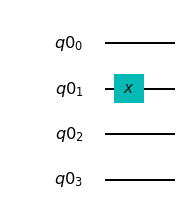

In [14]:
source_circ.draw(output='mpl')

After applying the $X$ gate, the control pair is in the state

$$
|\psi_\textrm{control}\rangle = |0\rangle_{0} |1\rangle_{1}.
$$

We then apply a specific single-qubit gate from the general single-qubit rotations $u3(\theta, \phi, \lambda)$ to qubit 0,

$$
u3(\theta, \phi , \lambda) = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

We set the parameters $\phi = \pi$ and $\lambda = 0$,

$$
u3(\theta, \phi = \pi , \lambda = 0) = \begin{pmatrix}
\cos(\theta/2) & -\sin(\theta/2) \\
-\sin(\theta/2) & -\cos(\theta/2) \\
\end{pmatrix},
$$

to bring the control qubits into the following state

$$
|\psi_\textrm{control}\rangle = \cos\left(\frac{\theta}{2}\right) |0\rangle_{0} |1\rangle_{1} - \sin\left(\frac{\theta}{2}\right) |1\rangle_{0} |1\rangle_{1}.
$$

Such a one-qubit rotation is realized with the method `u3`, to which we pass the rotation parameters as input arguments:

In [15]:
# This creates a parameter theta
theta = Parameter('theta')

# This implements a parametrized single-qubit gate u3 on qubit 0
source_circ.u3(theta, pi, 0, qr[0]);

Later in this tutorial, we will perform entanglement purification for different input fidelities $F$, i.e. for different values of $\theta$. Therefore, we have defined a parameter called `theta`, which is an instance of the class `Parameter` and to which a value can be assigned when the quantum circuit is executed. The input parameters of the method `u3` are the angles $\theta$, $\phi$ and $\lambda$, and the qubit to which the gate is applied. If we draw the circuit again, we now see another single-qubit operation $u_3$ applied to qubit $q0_0$:

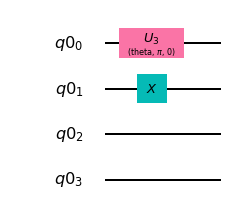

In [16]:
source_circ.draw(output='mpl')

Now we have to use a CNOT gate between qubit 0 and qubit 1, where qubit 1 is flipped if qubit 0 is in the state $|1\rangle$ to create the desired source state $|\psi_\textrm{S}\rangle$,

$$
|\psi_\textrm{control}\rangle =
|\psi_\textrm{S}\rangle =
\cos\left(\frac{\theta}{2}\right) |0\rangle_{0} |1\rangle_{1} - \sin\left(\frac{\theta}{2}\right) |1\rangle_{0} |0\rangle_{1}.
$$

In Qiskit a CNOT gate can be added to a quantum circuit using the method `cx`, which uses the control and the target qubit as input arguments:

In [17]:
# This implements a CNOT between qubit 0 as control qubit and qubit 1 as target qubit
source_circ.cx(qr[0], qr[1]);

(To avoid any misunderstandings here due to the term control and target qubit: The CNOT used here serves to generate the source state $|\psi_\textrm{S}\rangle$ and has nothing to do with the bilateral CNOT of the BBPSSW protocol.)

The complete quantum circuit to simulate a source of entangled qubit pairs and generate the state $|\psi_\textrm{S}\rangle$ between qubits $q0_0$ and $q0_1$ looks like this:

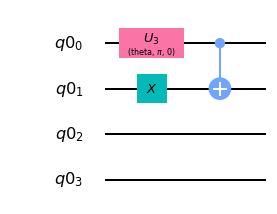

In [18]:
source_circ.draw(output='mpl')

Since we need two copies of the state $\rho_\textrm{S}$ to perform entanglement purification, we also need to set qubits 2 and 3 to the source state $|\psi_\textrm{S}\rangle$,

$$
|\psi_\textrm{target}\rangle =
|\psi_\textrm{S}\rangle =
\cos\left(\frac{\theta}{2}\right) |0\rangle_{2} |1\rangle_{3} - \sin\left(\frac{\theta}{2}\right) |1\rangle_{2} |0\rangle_{3}.
$$

We call this state $|\psi_\textrm{target}\rangle$ because the two qubits are the target pair of the BBPSSW protocol.

> **Exercise 1**  
Add the necessary quantum gates to the circuit `source_circ` so that the state $|\psi_\textrm{S}\rangle$ is generated between qubits 2 and 3. The implementation can be done in analogy to the above steps in which this state was generated between the control qubits.

In [19]:
###
### Enter your code here
###

# This implements a Pauli-X gate on qubit 3
source_circ.x(qr[3])
# This implements a single-qubit gate u3 on qubit 2
source_circ.u3(theta, pi , 0, qr[2])
# This implements a CNOT between qubit 2 as control qubit and qubit 3 as target qubit
source_circ.cx(qr[2], qr[3])

You can check your solution for Exercise 1 by drawing the circuit `source_circ` and comparing the two parts that create the state $|\psi_\textrm{S}\rangle$ between the control and the target qubits:

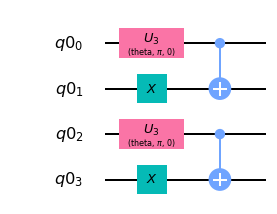

In [20]:
source_circ.draw(output='mpl')

A single-qubit rotation $u_3(\textrm{theta}, \pi, 0)$ should now also be applied to qubit $q0_2$, an $X$ gate should also be applied to qubit $q0_3$ and a CNOT should be applied between the two qubits.

To clearly define which qubits are the control pair and which qubits are the target pair of the BBPSSW protocol, we define the two arrays `control_qubits` and `target_qubits`, which contain the corresponding qubits:

In [21]:
control_qubits = [qr[0], qr[1]]
target_qubits = [qr[2], qr[3]]

### 2.3.3 Implementation of Twirl Operation by Random Bilateral Rotation

To implement the twirl operation, we create another instance of a quantum circuit called `twirl_circ` that performs the random bilateral rotation explained in step 1 of **Sec. 1.2**:

In [22]:
twirl_circ = QuantumCircuit(qr)

Remember: To implement the twirl, Alice and Bob randomly select an element from the set of 12 bilateral operations $\{U_i\}$ and apply the corresponding rotations locally to their qubit.

To implement an operation randomly selected from $\{U_i\}$, we define an auxiliary function `bilateral_rotation`. This function has the following input parameters:
* `circuit`: The instance of a quantum circuit to which the rotations are to be added.
* `qubits`: An array of qubits, each of which is rotated.
* `rot_idx`: An integer number that numbers the elements of the set $\{U_i\}$. For example, `rot_idx = 0` corresponds to the identity operation, `rot_idx = 1` corresponds $B_x B_x$, and so on.

In [23]:
def bilateral_rotation(circuit, qubits, rot_idx):
    """Adds a bilateral rotation to a quantum circuit.
    
    Keyword arguments:
    circuit --  quantum circuit to which the rotations are added
    qubits -- array of qubits, each of which is rotated
    rot_idx -- integer that numbers the rotations from the set of all rotations, ranges from 0 to 11
    """
    for qubit in qubits:
        if rot_idx == 0:
            pass
        
        elif rot_idx == 1:
            circuit.rx(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        elif rot_idx == 2:
            circuit.ry(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            
        elif rot_idx == 3:
            circuit.rz(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            
        elif rot_idx == 4:
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            
        elif rot_idx == 5:
            circuit.ry(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            
        elif rot_idx == 6:
            circuit.rz(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        elif rot_idx == 7:
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        elif rot_idx == 8:
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            
        elif rot_idx == 9:
            circuit.ry(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            
        elif rot_idx == 10:
            circuit.rz(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            circuit.rz(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        elif rot_idx == 11:
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            circuit.ry(pi/2, qubit)
            circuit.rx(pi/2, qubit)
            
        else:
            raise Exception('Input argument rot_idx has to be an integer between 0 and 11.')

The single-qubit rotations around the $x$, $y$ and $z$ axes required for the bilateral rotation can be implemented in Qiskit with the following methods:

* `rx`: Rotation about the $x$ axis.
* `ry`: Rotation about the $y$ axis.
* `rz`: Rotation about the $z$ axis.

The angle of rotation and the respective qubit must be specified as input arguments.

Remember that the bilateral operations $B_k$ from which the elements of $\{ U_i\}$ are constructed are rotations around the $k$ axis by an angle of $\pi/2$ and that the rotations are applied to both qubits of the entangled pair. With this knowledge it is understandable how the operations in the function `bilateral_rotation` are built up from single-qubit rotations `rx`, `ry` and `rz` by angles of $\pi/2$.

Now we add a random bilateral rotation to the circuit `twirl_circ` with the function `bilateral_rotation`, once for the control qubit pair and once for the target qubit pair:

In [24]:
# Create a random integer between 0 and 11
random_idx = np.random.randint(12)

# Add a random bilateral rotation to the circuit, applied to qubits 0 and 1 (control qubits)
bilateral_rotation(twirl_circ, control_qubits, random_idx)

# Add a random bilateral rotation to the circuit, applied to qubits 2 and 3 (target qubits)
bilateral_rotation(twirl_circ, target_qubits, random_idx)

The circuit `twirl_circ` thus has the following structure:

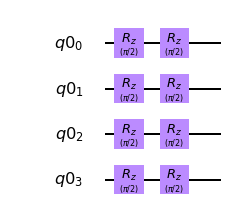

In [25]:
twirl_circ.draw(output='mpl')

If this operation is applied to a large number of qubit pairs in the state $|\psi_\textrm{S}\rangle$, the average output state is a Werner state $W_F$ (see step 1, **Sec. 1.2**),

$$
W_F = F |\Psi^-\rangle \langle \Psi^-| + \frac{1-F}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Phi^+\rangle \langle \Phi^+|+|\Phi^-\rangle \langle \Phi^-|\right).  
$$

This means that on average the control and target pairs are brought into a Werner state after the circuit `twirl_circ` has been applied.

### 2.3.4 Exchange of $|\Psi^-\rangle$ and $|\Phi^+\rangle$ Components

The next step is that Alice applies a unilateral $\pi$ rotation around the $y$ axis to her qubits, so that the components of $|\Psi^-\rangle$ and $|\Phi^+\rangle$ are exchanged in the control and the target pair, which leads to the transformation of a Werner state $W_F$ into the state $\rho_F$ (see step 2, **Sec 1.2**),

$$
\rho_F = F |\Phi^+\rangle \langle \Phi^+| + \frac{1-F}{3}\left(|\Psi^+\rangle \langle \Psi^+|+|\Psi^-\rangle \langle \Psi^-|+|\Phi^-\rangle \langle \Phi^-|\right). 
$$  

This means that the rotations are applied to one qubit of the control pair and one qubit of the target pair. Such a rotation corresponds to a Pauli-$Y$ gate, i.e. a bit flip and a phase flip gate,

$$
Y = 
\begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}.
$$

With Qiskit, such a rotation can be applied to a qubit with the method `y` on a circuit. We create a new quantum circuit called `purification_circ` and add the $Y$ gates to the corresponding qubits:

In [26]:
purification_circ = QuantumCircuit(qr)

# This implements a Pauli-Y gate on Alice's control qubit
purification_circ.y(control_qubits[0])

# This implements a Pauli-Y gate on Alice's target qubit
purification_circ.y(target_qubits[0]);

We call this quantum circuit `purification_circ`, because this operation is actually the first part of the BBPSSW protocol, which starts from qubit pairs in the Werner state $W_F$. (In the next section we therefore add the bilateral CNOT gate to this circuit.)

In this quantum circuit, the single-qubit operations $Y$ are applied to the qubits $q0_0$ and $q0_2$:

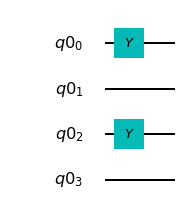

In [27]:
purification_circ.draw(output='mpl')

If the quantum circuit `purification_circ` is applied to two qubit pairs in the Werner state $W_F$, this results in two qubit pairs in the state $\rho_F$.

### 2.3.5 Application of Bilateral CNOT Gate

Following the BBPSSW protocol, the final step for Alice and Bob is to implement a bilateral CNOT gate. I.e. Alice and Bob each perform a CNOT gate between the two qubits they hold (**Step 3**, Section 1.2). Remember that in doing so, the qubits from the first pair serve as control qubits (qubits 0 and 1) and the qubits from the second pair act as target qubits (qubits 2 and 3).

> **Exercise 2**  
We already defined the arrays `control_qubits` and `target_qubits` above. Add the bilateral CNOT operation to the circuit `purification_circ` through the implementation of two CNOT gates respectively between elements of `control_qubits` and `target_qubits`.

In [28]:
# This implements a CNOT (controlled-X) gate between control qubit 0 to target qubit 2
#purification_circ.cx(qr[0], qr[2])

# This implements a CNOT (controlled-X) gate between control qubit 0 to target qubit 2
#purification_circ.cx(qr[1], qr[3]);
for i in range(2):
    purification_circ.cx(control_qubits[i], target_qubits[i])

When you draw the circuit `purification_circ`, additionally to the two $Y$ gates you should see two CNOT gates, one between qubits $q0_0$ and $q0_2$, and one between qubits $q0_1$ and $q0_3$:

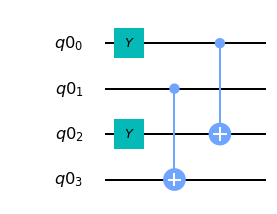

In [29]:
purification_circ.draw(output='mpl')

In the subsequent step of the BBPSSW protocol (**Step 4**, Section 1.2), the target qubits (qubits 2 and 3) should be measured in the computational basis. The measurement results need to be compared in order to verify a successful round of entanglement purification.

We will implement this step during the process of quantum state tomography (Section 2.4), which is described below. It is going to work in such a way that we will only perform state tomography of the control qubits if the outcomes of the measurements on the target qubits are equal.

We would like to point out once again that after the bilateral CNOT gate and the measurement of the target qubits, the control qubit pair must be brought back into Werner form in order to be able to carry out a subsequent round of purification (**Step 5**, Section 1.2). As explained above, this step is not necessary to demonstrate in increase in fidelity and can therefore be omitted for our purposes.

### 2.3.6 Concatenation of Quantum Circuits

In Qiskit it is possible to concatenate quantum circuits by simply adding them. We have split our full circuit for the BBPSSW protocol into the three parts for the initialization of the entangled qubit pairs, the twirl operation and the purification step itself. 

(Note that this was mainly due to pedagogical reasons. We could have implemented all gates in a single qunatum circuit right from the beginning.)

For the purification experiment that will be implemented below, the full circuit is built from three circuits `source_circ`, `twirl_circ`, and `purification_circ` from above:

In [30]:
# This concatenates the three quantum circuits
experiment_circ = source_circ + twirl_circ + purification_circ

Altogether, the complete circuit for the BBPSSW protocol has the following structure:

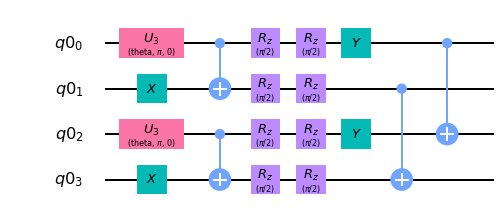

In [31]:
experiment_circ.draw(output='mpl')

## 2.4 (Conditional) Quantum State Tomography

Finally, we want to find out the state $\rho'_{F'}$ of the control qubit pair, i.e. the state of the qubits 0 and 1, so that we can calculate the fidelity $F'$,

$$
F' = \langle \Phi^+ | \rho'_{F'} | \Phi^+ \rangle.
$$

In order to reconstruct the density matrix $\rho'_{F'}$, we can use methods of **quantum tomography**. The library for tomography is part of the Qiskit element **Ignis**, which is a framework for handling noise in quantum circuits. Qiskit Ignis offers methods for the implementation of state and process tomography. However, for the purification protocol we only need to implement **quantum state tomography** and will therefore concentrate on it in this tutorial.

The functions and classes necessary for performing quantum state tomography can be imported from the tomography library:

In [32]:
# import tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

In order to perform quantum state tomography, we must first generate tomography circuits with the function `state_tomography_circuits`. From the measurement results of these tomography circuits we can then reconstruct $\rho'_{F'}$ with methods of the fitter class `StateTomographyFitter`.

The tomography circuits themselves consist of the original circuit to which specific gate and qubit measurements are attached. The `state_tomography_circuits` function therefore has the following input arguments:

* `circuit`: Quantum circuit on which the tomography is performed.
* `measured_qubits`: List of qubits from which the quantum state is reconstructed.

In our case we want to reconstruct the state of the control qubits after the execution of the circuit `experiment_circ`, i.e. the desired state tomography circuits can be generated as follows:

In [33]:
# Generate the state tomography circuits
tomography_circs = state_tomography_circuits(experiment_circ, control_qubits)

`tomography_circs` is a list of quantum circuits and from the measurement results of all these circuits the state $\rho'_{F'}$ can be reconstructed.

This is what the first tomography circuit e.g. looks like:

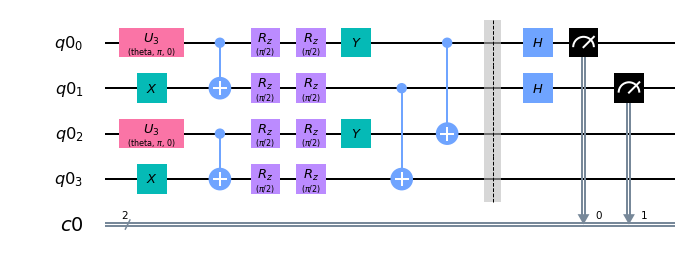

In [34]:
tomography_circs[0].draw(output='mpl')

We can recognize the circuit `experiment_circ` up to the bilateral CNOT gate and see that two additional Hadamard gates are applied to the qubits $q0_0$ and $q0_1$. The control qubits are then measured in the computational basis and the measurement outcomes stored in a classical register $c0$. This classical register was also added in the construction using `state_tomography_circuits` and its size corresponds to the number of qubits from which the quantum state is reconstructed. 

From the execution results of `tomography_circs` we would reconstruct the density matrix of the control qubits in case no measurement is performed on the target qubits. Thus, one can and should rightly remark that **Step 4 (Measurement of Target Qubits)** of the BBPSSW protocol is missing in the quantum circuit `experiment_circ`. Remember that purification only worked if the target qubits were measured and the measurements produced the same results! This is a crucial step, which must also be taken into account here! For this purpose we will perform **conditional quantum state tomography** and adapt a strategy presented in [3] to our needs.

By conditional state tomography, we mean that we perform the tomography only if the target qubits were measured either both in the state $|0\rangle$ or both in the state $|1\rangle$. The method of the fitter class `StateTomographyFitter`, which fits the density matrix of the control qubits, however, requires a set of quantum circuits in the form of the tomography circuits `tomography_circs` as input argument. When we add additional measurements of the target qubits, we need to introduce another classical register to store these measurement results. And in this case we cannot use the fitter directly, because the circuits would contain two classical registers.

What we will do instead is to make a copy of the circuit `experiment_circ`, add the measurements of the target qubits, and create a set of corresponding tomography circuits. These circuits are then actually executed. The results of this execution can then be edited to keep only those cases where the target qubits were measured with the same results. The edited results can then be fed into the fitter along with our original circuits `tomography_circs` to reconstruct the state $\rho'_{F'}$ of the control qubits.

The following shows how to create these ancilla circuits and **Part III** explicitly explains, among other things, how to edit the execution results correctly.

The conditional state tomography is thus implemented as follows. First we make a copy of our original circuit `experiment_circ`:

In [35]:
# This creates a copy of the experiment circuit without measurements
ancilla_circ = deepcopy(experiment_circ)

We call this circuit `ancilla_circ` since it helps to generate the information required to reconstruct $\rho'_{F'}$.

We then add a classical register to `ancilla_circ` which is an instance of the class `ClassicalRegister` to store the results of the target qubits measurement. So we need a two-bit register:

In [36]:
# This creates a classical register cr consisting of two bits
cr = ClassicalRegister(2)

# This adds a claasical register to the circuit
ancilla_circ.add_register(cr)

Next, we need to add the actual measurements of the target qubits. A measurement process can be added to a quantum circuit using the method `measure`. The method uses two input arguments, namely the qubit to be measured and the bit of a classical register to store the measurement result.

The desired measurement of the target qubits is therefore implemented as follows:

In [37]:
# This implements a measurement of qubit 2 and stores the result in bit 0
ancilla_circ.measure(target_qubits[0], cr[0])

# This implements a measurement of qubit 3 and stores the result in bit 1
ancilla_circ.measure(target_qubits[1], cr[1]);

Let's have a look at the circuit `ancilla_circ`:

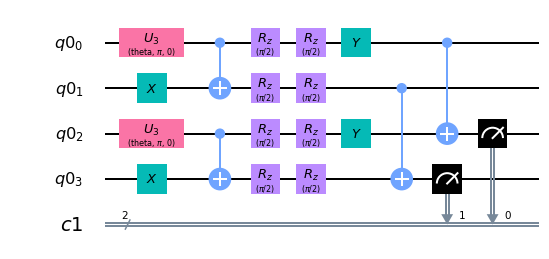

In [38]:
ancilla_circ.draw(output='mpl')

From the circuit diagram we can see that a classic register $c1$ has been added to the circuit `ancilla_circ` compared to the original circuit `experiment_circ` and that the qubits $q0_2$ and $q0_3$ are measured after the bilateral CNOT.

For the circuit `ancilla_circ` we also create tomography circuits `ancilla_tomography_circs` to reconstruct the state of the control qubits:

In [39]:
# Generate the state tomography circuits
ancilla_tomography_circs = state_tomography_circuits(ancilla_circ, control_qubits)

It is now these ancilla circuits `ancilla_tomography_circs` that are actually executed. As an example, we draw one of the ancilla circuits:

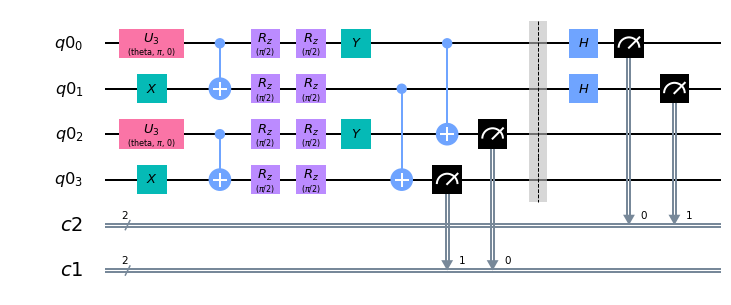

In [40]:
ancilla_tomography_circs[0].draw(output='mpl')

We have already seen that the target qubits $q0_2$ and $q0_3$ are measured in the classical register $c1$. In addition, the results for the tomography of the control qubits $q0_0$ and $q0_1$ are stored in the automatically added classical register $c2$.

At the end of Part II, we are at the point where we have generated all the quantum circuits necessary to implement the full BBPSSW protocol. In the following part we can therefore continue with the simulation of the purification experiment and have our implementation run with the simulator built into Qiskit.

# Part III: Simulation of the BBPSSW Protocol using Qiskit
***

In this part we will simulate the quantum circuit for the BBPSSW protocol. For this we use a simulator, which is integrated in Qiskit. In the first section, we simulate the BBPSSW protocol on a single quantum system. To eventually demonstrate the purification, we calculate an average over many quantum systems to approximately create the state $\rho'_{F'}$ and extract the purified fidelty $F'$.

To execute a quantum circuit in Qiskit, we have to choose a backend on which to run the quantum program. Such a backend can either be a simulator or a real IBM Q device.

The QASM simulator is part of the Qiskit element **Aer** and to use it, we need to import the following libraries:

In [41]:
from qiskit import Aer, execute

To choose the simulator as the backend on which to run the quantum circuit, we use the method `get_backend`:

In [42]:
# This provides the QASM simulator backend
backend_QASM = Aer.get_backend('qasm_simulator')

## 3.1 Single Quantum System

In the following, we are first going to run the circuits `tomography_circs` and reconstruct the density matrix for the control qubits. This is basically done for pedagocial reasons to introduce the working principle of the class `StateTomographyFitter`. After that we run the ancilla circuits `ancilla_tomography_circs` and explain how to edit the execution results in order to be able to use the fitter.

We can run a quantum circuit using the function `execute`, which takes as input arguments:
* `circuits`: A single quantum circuit or a list of quantum circuits to be executed.
* `backend`: The backend to execute the circuits on.
* `shots`: Number of repeated executions of each circuit.
* `parameter_binds`: List of parameter-value pairs (given as python dictionary) that bind the parameters to specific values.

To run a simulation of the circuits `tomography_circs` with an input fidelity of for example $F=0.75$ we can run the following code:

In [43]:
# This executes the tomography circuits
job = execute(tomography_circs, backend_QASM, shots=512, parameter_binds=[{theta: F_to_theta(0.75)}])

Here the parameter $\theta$ is bound to the value corresponding to a fidelity of $F = 0.75$ via the function `F_to_theta` defined at the beginning.

What is returned after the simulation is an object that we name `job` and from which we can extract the results of the simulation using the method `result`:

In [44]:
# This returns a result object including information about the experiment
job_results = job.result()

Now that we have executed the tomography circuit, we can use methods from quantum state tomography to reconstruct the density matrix of the control qubits. All this is implemented in Qiskit through the class `StateTomographyFitter`.

Using `job_results` we first create a fitter object from the class `StateTomographyFitter`:

In [45]:
fitter = StateTomographyFitter(job_results, tomography_circs)

The fitter provides a method `fit` that returns the reconstructed density matrix we call `rho_fit`:

In [46]:
# This reconstructs the density matrix from the job results
rho_fit = fitter.fit()

There are several ways to visualize quantum states in Qiskit, which we are not going into detail here. We just mention `plot_state_city` that draws two bar blots of the real and imaginary parts of `rho_fit`:

In [ ]:
from qiskit.tools.visualization import plot_state_city

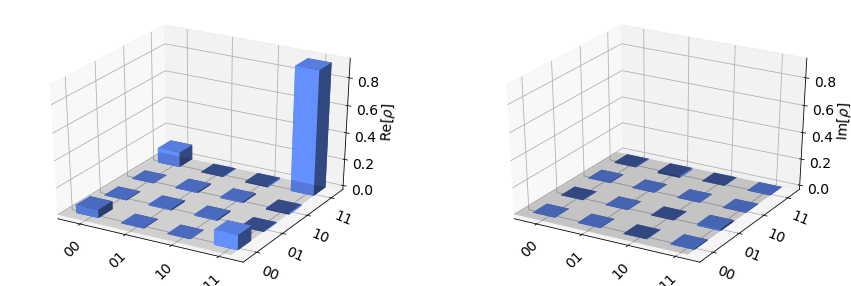

In [47]:
plot_state_city(rho_fit)

Now that we have seen how to use Qiskits tools for quantum state tomography, we can proceed and execute conditional quantum state tomography.

We start by performing the same steps as above, i.e. we first execute the ancillas `ancilla_tomography_circs` and retrieve the job results:

In [48]:
job = execute(ancilla_tomography_circs, backend_QASM, shots=512, parameter_binds=[{theta: 0.75}])
ancilla_results = job.result()

So far, the results object `ancilla_results` also contains results from unsuccessful execution (i.e. where the target qubits where measured with different outcomes) and it has a structure from which we cannot reconstruct the density matrix of the control qubits directly. So what we have to to is:

1. Discard the results from unsuccessful executions.
2. Remove those parts in the object `ancilla_results` that prevent us from using the fitter.

To better see what excatly needs to be done, let's compare the property `results` of the `job_results` and the `ancilla_results`:

In [49]:
job_results.results[0]

ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=164, 0x1=93, 0x2=90, 0x3=165)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=4, name="('X', 'X')", qreg_sizes=[['q0', 4]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2], ['q0', 3]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 1, 'parallel_state_update': 4}, seed_simulator=1656945215, shots=512, status='DONE', success=True, time_taken=0.018116063)

In [50]:
ancilla_results.results[0]

ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=100, 0x1=66, 0x2=80, 0x3=140, 0xc=60, 0xf=66)), header=Obj(clbit_labels=[['c2', 0], ['c2', 1], ['c1', 0], ['c1', 1]], creg_sizes=[['c2', 2], ['c1', 2]], memory_slots=4, n_qubits=4, name="('X', 'X')", qreg_sizes=[['q0', 4]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2], ['q0', 3]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 4, 'parallel_state_update': 1}, seed_simulator=1668269652, shots=512, status='DONE', success=True, time_taken=0.026485618000000002)

The property `results` is a list that contains information about the results of each circuit that was executed. (Here the `ancilla_tomography_circs`.)

First, the property `counts` has to be adjusted in such a way that all events where the target qubits had different outcomes are removed and the counts for the outcomes of the control qubits have to be adjusted. With this we mean that if there were events such as `'00 11'` and `'11 11'` the counts of those events are added for the measurement of a control qubit outcome of `'11`.

We can get the counts as a dictionary using the method `get_counts`. So for the first circuit in `ancilla_tomography_circs` the counts dictionary can be created like this:

In [51]:
ancilla_results.get_counts(0)

{'00 11': 140,
 '00 01': 66,
 '00 10': 80,
 '00 00': 100,
 '11 11': 66,
 '11 00': 60}

The first two bits are the outcomes of the target qubits and so we have to remove all key-value pairs whose first two bits are either `'01'` or `'10'`:

In [53]:
conditional_counts = {}
for result, count in ancilla_results.get_counts(0).items():
    target_measurement = result.split(' ')[0]
    control_measurement = result.split(' ')[1]
    if target_measurement in ('00', '11'):
            if control_measurement in conditional_counts:
                conditional_counts[control_measurement] = conditional_counts[control_measurement] + count
            else:
                conditional_counts[control_measurement] = count
                
conditional_counts

{'11': 206, '01': 66, '10': 80, '00': 160}

Now the field counts from the object `job_results.results[0]` has the method `from_dict` that creates the required data struture a from dictionary in the form of `conditional_counts`:

In [53]:
ancilla_results.results[0].data.counts.from_dict(conditional_counts)

Obj(00=34, 01=210, 10=38, 11=230)

In addition we have to do the following steps:
* Remove the bits from the classical register $c1$ in `clbit_labels` and in `creg_sizes`. 
* Set the value of `memory_slots` to 2.

In [54]:
# This creates a copy of the results object
conditional_results = deepcopy(ancilla_results)

# Loop through results for each circuit
for ii,_ in enumerate(ancilla_results.results):
    # Get all counts
    counts = ancilla_results.get_counts(ii)
    
    # Create empty dictionary to store counts for control qubits
    conditional_counts = {}
    
    # Extract counts for each measurement result
    for result, count in counts.items():
        # Split result into parts for target qubits and control qubits
        target_measurement = result.split(' ')[0]
        control_measurement = result.split(' ')[1]
        
        # Keep counts of successful purifications
        if target_measurement in ('00', '11'):
            if control_measurement in conditional_counts:
                conditional_counts[control_measurement] = conditional_counts[control_measurement] + count
            else:
                conditional_counts[control_measurement] = count
    
    # Create new counts property from conditional_counts
    conditional_counts_struct = conditional_results.results[ii].data.counts.from_dict(conditional_counts)
    conditional_results.results[ii].data.counts = conditional_counts_struct
    
    # Remove classical bits in ancilla register
    old_labels = conditional_results.results[ii].header.clbit_labels
    conditional_results.results[ii].header.clbit_labels = old_labels[0:2]
    
    # Remove ancilla register
    old_sizes = conditional_results.results[ii].header.creg_sizes
    conditional_results.results[ii].header.creg_sizes = [old_sizes[0]]
    
    # Set memory_slots to 2
    conditional_results.results[ii].header.memory_slots = 2

If we inspect the new results `conditional_results` we see that they now have the same shape as the `job_results`:

In [55]:
conditional_results.results[0]

ExperimentResult(data=ExperimentResultData(counts=Obj(00=194, 01=69, 10=63, 11=186)), header=Obj(clbit_labels=[['c2', 0], ['c2', 1]], creg_sizes=[['c2', 2]], memory_slots=2, n_qubits=4, name="('X', 'X')", qreg_sizes=[['q0', 4]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2], ['q0', 3]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 4, 'parallel_state_update': 1}, seed_simulator=3394762240, shots=512, status='DONE', success=True, time_taken=0.0032311820000000004)

(To the best knowledge of the author, the property `shots` does not need to be adjusted and the fitter takes care of a possibly smaller number of remaining events.)

The object `conditional_results` can now be used to reconstruct the density matrix of the control qubits in case of a successful purification, again using the `StateTomographyFitter` class:

In [56]:
# This reconstructs the density matrix from condictional results
conditional_rho_fit = StateTomographyFitter(conditional_results, tomography_circs).fit()

The fitted density matrix in case of a successful purification is now:

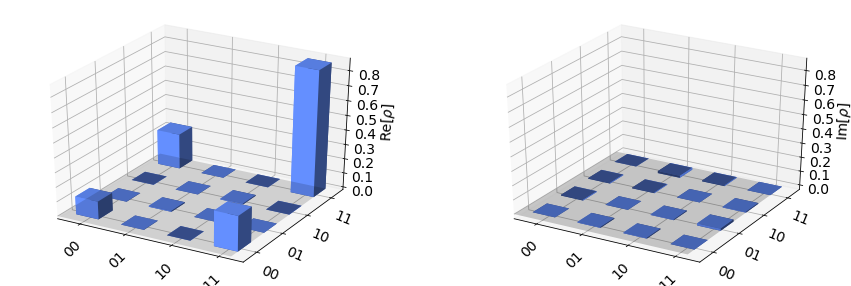

In [57]:
plot_state_city(conditional_rho_fit)

The state `conditional_rho_fit` depends on the bilateral rotation contained in the twirl circuit `twirl_circ`, because Alice and Bob choose randomly, which bilateral rotation is implemented in the beginning.

Remember that the reason for this was that the BBPSSW protocol works on Werner states $W_F$ and they are arithmetic averages of bilaterally-rotated density matrices,

$$
W_F = \frac{1}{12} \sum_{i=1}^{12} U_i^\dagger \rho_\textrm{S} U_i.
$$

In practice, Alice and Bob choose a random element from the set $\{U_i\}$ of bilateral operations and apply it to a source state $\rho_\textrm{S}$. If Alice and Bob perform this random operation on a number $N$ of states $\rho_\textrm{S}$, then for large $N$ the average state will be approximately a Werner state,

$$
W_F \approx \frac{1}{N} \sum_{n=1}^N \rho_n,
$$

where $\rho_n$ shall denote the state after the bilateral rotation.

The interesting figure of merit is thus not a single control-qubit state `conditional_rho_fit` after the BBPSSW protocol but rather an average of these states over many execution runs with randomly chosen operations $U_i$ in the twirl circuit `twirl_circ`. In the following section, we therefore study an a large number of source states $\rho_\textrm{S}$ and calculate the average outcome of the BBPSSW protocol to demonstrate its working principle.

## 3.2 Ensemble Average

### 3.2.1 Definition of Auxiliary Functions

To make the following section easier to read, we define some helpful functions to implement the tomography for the case of an ensemble. Essentially, these functions summarize the steps from the previous section in a compact way.

First we define a function `experiment_circuit`, which has the index of the bilateral rotation as input parameter and returns a corresponding experiment circuit for the whole purification procedure:

In [58]:
def experiment_circuit(index):
    """ Returns experiment circuit corresponding to an index.
    
    Keyword arguments:
    index -- integer between 0 and 11
    
    Returns:
    experiment_circ -- quantum circuit
    """
    if index < 0 or index > 11:
        raise Exception("Index for bilateral rotation exceeds range of possible values.")
        
    # Create the twirl circuit from the bilateral rotations
    twirl_circ = QuantumCircuit(qr)
    bilateral_rotation(twirl_circ, control_qubits, index)
    bilateral_rotation(twirl_circ, target_qubits, index)
    
    experiment_circ = source_circ + twirl_circ + purification_circ
    
    return experiment_circ

Next we define a function `ancilla_circuit` which takes a quantum circuit and returns a corresponding ancilla circuit which is a copy of the original circuit and in which certain qubits are measured:

In [59]:
def ancilla_circuit(quantum_circuit, qubits, bits):
    """ Return an ancilla circuit that includes additional measurements.
    
    Keyword arguments:
    quantum_circuit -- single quantum circuit
    qubits -- list of qubits to be measured
    bits -- list of bits to store measurement results
    """
    if len(qubits) != len(bits):
        raise Exception("Number of qubits must equal number of bits.")
        
    ancilla_circ = deepcopy(quantum_circuit)
    ancilla_circ.add_register(cr)
    
    for qubit, bit in zip(qubits, bits):
        ancilla_circ.measure(qubit, bit)
    
    return ancilla_circ

To perform conditional quantum state tomography, we have seen that the ancilla tomography circuits must be executed, and we need the tomography circuits for the original experiment circuit along with the execution results to fit the state of the control qubits. For this purpose we define a function `conditional_tomography_circuits`, which returns both sets of tomography circuits:

In [60]:
def conditional_tomography_circuits(quantum_circuit):
    """ Returns all tomography circuits for conditional quantum state tomography. 
    
    Keyword arguments:
    quantum_circuit -- single quantum circuit
    
    Returns:
    tomography_circs -- tomography circuits for quantum circuit
    ancilla_tomography_circs -- ancilla tomography circuits with measurements on control qubits
    """
    ancilla_circ = ancilla_circuit(quantum_circuit, target_qubits, [cr[0], cr[1]])
    tomography_circs = state_tomography_circuits(quantum_circuit, control_qubits)
    ancilla_tomography_circs = state_tomography_circuits(ancilla_circ, control_qubits)
    
    return tomography_circs, ancilla_tomography_circs

We have also seen how to edit the results of the execution of ancilla tomography circuits so that all shots that do not meet the condition for successful purification are discarded. We summarize those steps in the function `purification_shots`:

In [61]:
def purification_shots(job_results):
    """ Keep counts for successful purifications and return corresponding result.
    
    Keyword arguments:
    job_results -- execution results
    
    Returns:
    conditional_results -- results without unsuccessful shots
    """
    
    conditional_results = deepcopy(job_results)
    for ii,_ in enumerate(job_results.results):
        counts = job_results.get_counts(ii)
        conditional_counts = {}

        for result, count in counts.items():
            target_measurement = result.split(' ')[0]
            control_measurement = result.split(' ')[1]

            if target_measurement in ('00', '11'):
                if control_measurement in conditional_counts:
                    conditional_counts[control_measurement] = conditional_counts[control_measurement] + count
                else:
                    conditional_counts[control_measurement] = count

        conditional_results.results[ii].data.counts \
            = conditional_results.results[ii].data.counts.from_dict(conditional_counts)
        conditional_results.results[ii].header.clbit_labels = conditional_results.results[ii].header.clbit_labels[0:2]
        conditional_results.results[ii].header.creg_sizes = [conditional_results.results[ii].header.creg_sizes[0]]
        conditional_results.results[ii].header.memory_slots = 2
            
    return conditional_results

In order to reconstruct a density matrix from tomography results, we have seen that an instance of the class `StateTomographyFitter` must be initiated from the tomography circuits and the corresponding execution results. In the following steps of the tutorial it is therefore helpful to save the tomography circuits and the corresponding execution job in some way and we choose a Python dictionary for it. To easily create a dictionary of the desired structure, we define the function `job_dictionary`:

In [62]:
def job_dictionary(circuits, job):
    """ Return dictionary.
    
    Keyword arguments:
    circuits -- list of quantum circuits
    job -- execution job, should correspond to execution of circuits
    """
    job_dict = {}
    job_dict["circuits"] = circuits
    job_dict["job"] = job
    
    return job_dict

The reason why we do not save the execution results directly becomes apparent at a later point. In short, running a job on a real device can take time because other users' jobs can also be in the queue. By saving the job object itself, we can regularly check its state until its execution is complete.

When a job has been executed, a density matrix can be reconstructed from a dictionary returned by the above function using the function `rho_from_dict` defined below. An additional input argument `cond_tomo` also allows to specify whether conditional tomography should be performed (i.e. all unsuccessful purification shots are discarded from the tomography results) or not:

In [63]:
def rho_from_dict(job_dict, cond_tomo):
    """ Desc does here.
    
    Keyword arguments:
    experiment_dict -- dictionary
    cond_tomo -- boolean specifying to perform conditional tomography (cond_tomo=True)
    
    Returns:
    rho_fit -- reconstructed density matrix
    """
    if cond_tomo:
        conditional_results = purification_shots(job_dict["job"].result())
        rho_fit = StateTomographyFitter(conditional_results, job_dict["circuits"]).fit()
    else:
        rho_fit = StateTomographyFitter(job_dict["job"].result(), job_dict["circuits"]).fit()
    
    return rho_fit

We summarize some of the previous functions and the execution of the tomography circuits in the function `execute_purification`, which returns exactly the dictionary containing the execution job and the corresponding tomography circuits:

In [64]:
def execute_purification(F_in, index, backend, shots=1024, noise_model=None, coupling_map=None):
    """Returns density matrix of control qubits after BBPSSW protocol.
    
    Keyword arguments:
    F_in -- input fidelity
    index -- integer between 0 and 11, defines bilateral rotation
    backend -- backend to run circuits on
    shots -- number of shots per execution
    noise_model -- noise model for simulation of real device (required for noisy simulation)
    coupling_map -- coupling structure of physical qubits (required for noisy simulation)
    
    Returns:
    job_dict -- dictionary containing job and tomography circuits
    """
    if noise_model == None:
        basis_gates = None
    else:
        basis_gates = noise_model.basis_gates
    
    # create circuits
    experiment_circ = experiment_circuit(index)
    tomography_circs, ancilla_tomography_circs = conditional_tomography_circuits(experiment_circ)
    
    # execute circuits on simulator or real device
    if backend.configuration().simulator == False:
        job = execute(ancilla_tomography_circs, backend, shots=shots, parameter_binds=[{theta: F_to_theta(F_in)}])
    else:
        job = execute(ancilla_tomography_circs, backend, shots=shots, noise_model=noise_model,
                      coupling_map=coupling_map, basis_gates=basis_gates, parameter_binds=[{theta: F_to_theta(F_in)}])
    
    job_dict = job_dictionary(tomography_circs, job)
    
    return job_dict

In the function `execute_purification` we already consider the case of a simulation with noise, which will be dealt with in the next part (**Part IV: Noise in the simulation model**). To perform such a simulation, we need additional objects (`noise_model`, `coupling_map` and `basis_gates`), which are already included in the above function. We will explain what these objects are when required in the tutorial.

In addition, we have already prepared the case that the circuits will run on a real IBM Q device. If the desired backend is a real device, i.e. the property `backend.configuration().simulator` is `False`, we do not pass the parameters for a noisy simulation (`noise_model`, `coupling_map` and `basis_gates`) to the Qiskit function `execute`.

With the auxiliary functions defined above, we essentially perform the following two steps to purify entanglement (whether as a unitary or noisy simulation, or on a real device):
1. Create and execute quantum circuits using `execute_purification`.
2. Reconstruct a density matrix using `rho_from_dict`.

### 3.2.2 Simulation

In Section **3.1 Single Quantum System** we have executed the BBPSSW protocol for a single system consisting of two qubit pairs in the state $\rho_\textrm{S}$. In this case, the result of the protocol, i.e. the state of the control qubits, depends on the randomly selected bilateral rotation.

However, we are interested in the state $\rho'_{F'}$, which is the average state of the control qubits after applying the BBPSSW protocol. To get this state $\rho'_{F'}$ in our simulation, we calculate the average

$$
\rho'_{F'} \approx \frac{1}{N} \sum_{n=1}^{N} \rho_n',
$$

where $\rho_n'$ denotes the control-qubit state after the application of the BBPSSW protocol to a single system in execution run $n$ and $N$ is the total number of execution runs. (This is equivalent to applying the protocol to $N$ quantum systems and averaging across all systems.) Here, each execution run varies in the random selection of the bilateral rotation. The number of $N$ runs must therefore be large enough to make the result independent of the selected rotations. (We would get the exact state $\rho'_{F'}$ in the limit $N \rightarrow \infty$.)

With the functions defined above, the implementation in Qiskit for $N=100$ runs and an initial fidlity of $F = 0.75$ looks like this to approximately get the average state $\rho'_{F'}$:

In [65]:
# number of runs and initial fidelity
runs = 100
F = 0.75

# empty list to store the reconstructed density matrix of each run
fitted_states = []

# perform runs
for ii in range(runs):
    random_idx = np.random.randint(12)
    experiment_circ = experiment_circuit(random_idx)
    tomography_circs, ancilla_tomography_circs = conditional_tomography_circuits(experiment_circ)
    
    # execute ancilla tomography circuits
    job = execute(ancilla_tomography_circs, backend_QASM, shots=1024, parameter_binds=[{theta: F_to_theta(F)}])
    job_results = job.result()
    
    # keep successful shots
    conditional_results = purification_shots(job_results)

    # reconstruct density matrix
    rho_fit = StateTomographyFitter(conditional_results, tomography_circs).fit()
    
    # add density matrix to list
    fitted_states.append(rho_fit)
    
# calculate the ensemble average
rho_average = sum(fitted_states)/runs

Also here we can depict the average state `rho_average`, e.g. by representing its real and imaginary parts:

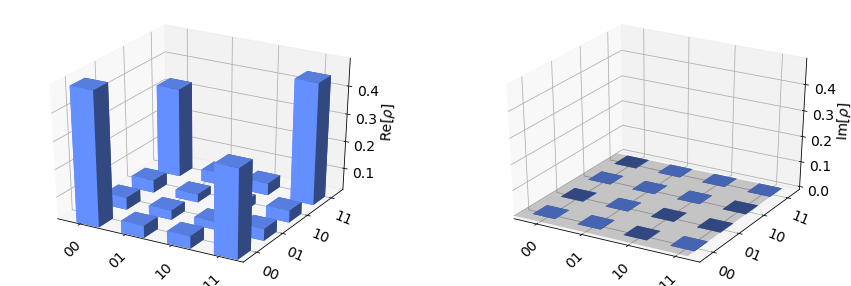

In [66]:
plot_state_city(rho_average)

Insert comparison to initial state!

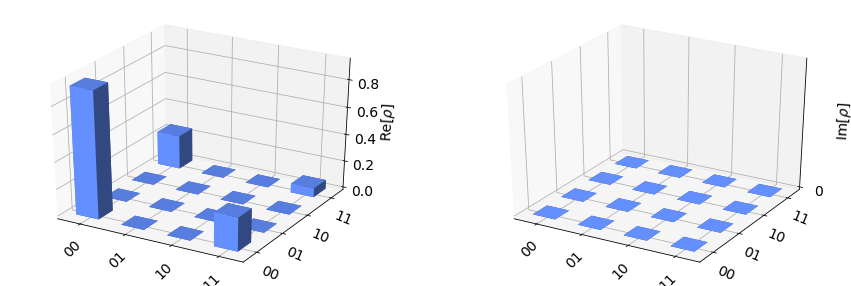

In [67]:
rho_S = np.cos(F_to_theta(F)/2)*np.array([1, 0, 0, 0]) + np.sin(F_to_theta(F)/2)*np.array([0, 0, 0, 1])
plot_state_city(rho_S)

Now we want to see how well our simulation worked and calculate the fidelity $F'$,

$$
F' = \langle \Phi^+ | \rho'_{F'} | \Phi^+ \rangle.
$$

We can use the Qiskit function `state_fidelity` which returns the fidelity between two quantum states given as input arguments:

In [ ]:
from qiskit.quantum_info import state_fidelity

In [68]:
simulated_output_fidelity = state_fidelity(rho_average, phi_plus)

We compare the fidelity `simulated_output_fidelity` coming from our simulation with the theoretical output value of the BBPSSW protocol:

In [69]:
print('Input fidelity =', F)
print('Theoretical output fidelity = {:.4f}'.format(output_fidelity(F)))
print('Simulated output fidelity = {:.4f}'.format(simulated_output_fidelity))

Input fidelity = 0.75
Theoretical output fidelity = 0.7885
Simulated output fidelity = 0.7909


The output fidelity of the simulation is close to the theoretically expected one, which can also be seen from plotting the result:

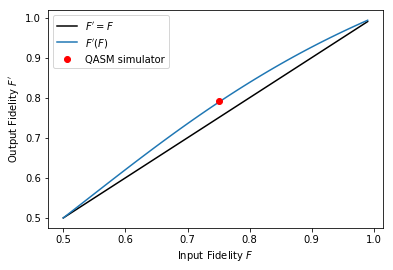

In [70]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.plot(F, simulated_output_fidelity, 'ro', label='QASM simulator')
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

> **Exercise 3**  
The state $\rho'_{F'}$ of the control qubits can be calculated to be 
>
>$$
\rho'_{F'} =
$$
>
>Write a function `output_state` in analogy to the function `Werner_state`, which takes the fidelity $F$ as an input argument and returns the theoretical state $\rho'_{F'}$ as a numpy array.

In [71]:
def output_state(F):
    """Returns output state rho'_F' after BBPSSW protocol.
    
    Keyword arguments:
    F -- fidelity of input state, range [0, 1]
    """
    if F < 0 or F > 1:
        raise Exception('Fidelity must be between 0 and 1.')
    
    state = F*np.outer(psi_minus, psi_minus.conj().T) \
    + (1 - F)/3*(np.outer(phi_plus, phi_plus.conj().T) \
                         + np.outer(phi_minus, phi_minus.conj().T) \
                         + np.outer(psi_plus, psi_plus.conj().T))
    
    return state

> **Exercise 4**
Create the exact state $\rho'_{F'}$ using your function `output_state` and calculate the state fidelity between $\rho'_{F'}$ and the simulated output state `rho_average`. If the implementation is correct, the fidelity should be around 99 %.

After seeing that our Qiskit implementation of the BBPSSW protocol works, we will perform entanglement purification for different input fidelities $F$ in the range between 0.5 and 1.

We define these fidelities in a numpy array `input_fidelities`:

In [72]:
input_fidelities = np.arange(0.5, 1, 0.05)

We simulate the BBPSSW protocol for all fidelities using the previously defined function `execute_purification`, which further shortens the implementation, and store all output fidelities in a list called `output_fidelities`:

In [73]:
runs = 100

# empty list to store output fidelities
output_fidelities = []

for jj, fidelity in enumerate(input_fidelities):
    fitted_states = []
    for ii in range(runs):
        random_idx = np.random.randint(12)
        
        # execute circuits and reconstruct density matrix
        job_dict = execute_purification(fidelity, random_idx, backend_QASM)
        rho_fit = rho_from_dict(job_dict, cond_tomo=True)
        fitted_states.append(rho_fit)
        
    rho_average = sum(fitted_states)/runs
    # calculate fidelity and add to list
    output_fidelities.append(state_fidelity(rho_average, phi_plus))
    
    print(str(jj+1) + "/" + str(len(input_fidelities)) + " experiments done.")

1/10 experiments done.
2/10 experiments done.
3/10 experiments done.
4/10 experiments done.
5/10 experiments done.
6/10 experiments done.
7/10 experiments done.
8/10 experiments done.
9/10 experiments done.
10/10 experiments done.


If we now compare the purified fidelities with the input fidelities, we can see a good agreement between the simulated results and the theoretical expectation:

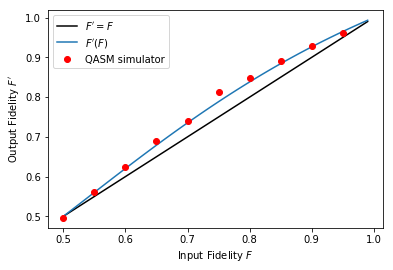

In [74]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.plot(input_fidelities, output_fidelities, 'ro', label='QASM simulator')
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

From the simulation, in which we have not included any error sources, we see that the implementation of the BBPSSW protocol for entanglement purification works.

The ultimate goal is to run the BBPSSW protocol on a real IBM Q device. But before we do this, we will include noise in our simulation model to consider imperfections in the quantum computation and see how much the effects of noise affect output fidelity.

# Part IV: Including Noise in the Simulation Model
***

In this part we will simulate the quantum circuit for the BBPSSW protocol using a model that includes noise. Noise in this context means errors that occur on real devices such as single-qubit gate errors, two-qubit gate errors and single-qubit readout errors. A simple noise model can e.g. be created using error parameters directly provided through the calibration data of the real devices. This is going to be the way we construct the noise model here.

In the following, we show how to choose a real IBM Q device as backend and read out the necessary data using an IBM Q account. Afterwards we explain how to generate a noise model using integrated Qiskit functions and run a noisy simulation using the QASM simulator.

## 4.1 IBM Q Account

To use the IBM Q Experience, we first have to import the necessary libraries:

In [75]:
from qiskit import IBMQ

If you have saved your IBM Q credentials locally beforehand, you can load your IBM Q account with the function `load_account`:

In [76]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

More information about to handle your IBM Q account, we refer to the corresponding Qiskit Notebook [4].

The real backends are provided by so-called providers. In the authors case, we have only access to a single provider, namely to the one that gives access to the public IBM Q devices:

In [77]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

We can access this provider using the method `get_provider` and specifying it as input argument:

In [78]:
my_provider = IBMQ.get_provider(hub='ibm-q')

The provider instance `my_provider` lets you access a list of accessible devices using the method `backends`:

In [79]:
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

A real IBM Q device can now be selected as backend with the method `get_backend` and for this tutorial we use the device `ibmqx2`:

In [80]:
backend_IBMQ = my_provider.get_backend('ibmqx2')

## 4.2 Creation of Noise Model in Qiskit

It was already mentioned that Qiskit provides integrated functions to construct simple noise models from device parameters such as

* single-qubit gate errors,
* two-qubit gate errors, and
* single-qubit readout errors.

A noise model can be created by providing values for the above mentioned parameters or directly from the calibration data of real IBM Q devices. To use this feature, we first need to import the module `noise` from the Qiskit element Aer:

In [81]:
from qiskit.providers.aer import noise

The above listed noise parameters of a real device are stored in the backend properties, to which one has access using the method `properties`:

In [82]:
properties = backend_IBMQ.properties()

We do not need to extract specific information from the object `properties` to create a corresponding noise model. Instead, we use the function `basic_device_noise_model`, which is part of the `noise` module, to create a noise model directly from the backend properties:

In [83]:
noise_model = noise.device.basic_device_noise_model(properties)

The object `noise_model` is an instance of the `NoiseModel` class and can be used in the QASM simulator to perform noisy simulations.

Since not all qubits on a real device are directly coupled to each other, it will probably happen that additional gates need to be introduced when running a circuit on a real device. These gates will swap quantum states between qubits such that multi-qubit gates can be performed. To incorporate such processes in the simulation, the function `execute` takes an additional input parameter `coupling_map`, in which the qubit couplings can be provided.

We can also read the coupling directly from the device itself using the property `coupling_map` of a backend configuration:

In [84]:
coupling_map = backend_IBMQ.configuration().coupling_map

With the `noise_model` together with `coupling_map` we have all the information ready that is required to perform a (simple) noisy simulation of the quantum circuit for the BBPSSW protocol. 

## 4.3 Simulation Including Noise

To perform a noisy simulation with the QASM simulator, we can again use the function `execute` and provide two additional input parameters, which are
* `noise_model`: An instance of the `NoiseModel` class.
* `coupling_map`: A list of specified qubit couplings.

Our function `execute_purification` has been already defined in such a way that we simply give the additional parameters `noise_model` and `coupling_map` as input arguments, which are then basically fed into the function `execute` to perform the noisy simulation to eventually obtain the reconstructed density matrix of the control qubits.

**However, to determine the output fidelity as a function of the input fidelity in the noisy scenario, we need to perform an additional simulation.**

Remember that the BBPSSW protocol works on Werner states $W_F$. So the input fidelity $F$ to the BBPSSW protocol is the fidelity of the Werner state $W_F$ that we created after the application the twirl circuit `twirl_circ`. In case of a noisy simulation this fidelity is most likely to be less than the fidelity $F_\textrm{S}$ of the source state $\rho_\textrm{S}$,

$$
F_\textrm{S} = \langle \Psi^- | \rho_\textrm{S} | \Psi^- \rangle,
$$

due to errors in the preparation process of $W_F$. I.e. in general we have have 

$$
F_\textrm{S} \leq F,
$$

with equality only in the case of a unitary time evolution without any sources of noise. 

The actual input fidelity $F$ is the fidelity of the two-qubit state after the initialization circuit `source_circ` and application the twirl operation in `twirl_circ`.

To eventually compare the input fidelity $F$ to the output fidelity $F'$, we thus have to first perform a simulation of only the circuits `source_circ` and `twirl_circ` to find the actual input state to the BBPSSW protocol. We also need to check if it is indeed a state of Werner form $W_F$ and from it then calculate the actual input fidelity $F$.

### 4.3.1 Initial State and Initial Fidelity

As we described above, the input fidelity $F$ to the BBPSSW protocol is the fidelity of the state $W_F$ towards the state $|\Psi^-\rangle$, which is obtained after the initialization circuit and the twirl operation.

(We still need to show that it actually is a Werner state, which we can do after the noisy simulation.)

In the following we will perform a noisy simulation of a quantum circuit that consists of the circuits `source_circ` and `twirl_circ`, and to reconstruct the state $W_F$, we perform quantum state tomography of the control qubits.

Again, we define some helpful functions that make the implementation more easy to read and understand.

First, we define a function `initialization_circuit` that takes the index of the bilateral rotation as an input argument and returns a corresponding experiment circuit for the initialization procedure including the twirl:

In [85]:
def initialization_circuit(index):
    """ Provide an index for bilateral rotation and return corresponding experiment circuit. """
    if index < 0 or index > 11:
        raise Exception("Index for bilateral rotation exceeds range of possible values.")
        
    twirl_circ = QuantumCircuit(qr)
    bilateral_rotation(twirl_circ, control_qubits, index)
    bilateral_rotation(twirl_circ, target_qubits, index)
    
    experiment_circ = source_circ + twirl_circ
    
    return experiment_circ

We summarize all the steps for the execution of the initialization procedure in the function `execute_initialization`. This function creates the initialization circuit via the function `initialization_circuit` from above, generates the corresponding tomography circuits using the Qiskit function `state_tomography_circuits`, and executes the tomography circuits on the backend that is given as input parameter:

In [86]:
def execute_initialization(F_in, index, backend, shots=1024, noise_model=None, coupling_map=None):
    """Desc goes here.
    
    Keyword arguments:
    F_in -- input fidelity
    index -- integer between 0 and 11, defines bilateral rotation
    backend -- backend to run circuits on
    shots -- number of shots per execution
    noise_model -- noise model for simulation of real device
    coupling_map -- coupling structure of physical qubits
    
    Returns:
    job_dict -- dictionary containing execution job and corrresponding quantum circuits
    """
    if noise_model == None:
        basis_gates = None
    else:
        basis_gates = noise_model.basis_gates
    
    # create circuits
    experiment_circ = initialization_circuit(index)
    tomography_circs = state_tomography_circuits(experiment_circ, control_qubits)

    # execute circuits
    if backend.configuration().simulator == False:
        job = execute(tomography_circs, backend, shots=shots, parameter_binds=[{theta: F_to_theta(F_in)}])
    else:
        job = execute(tomography_circs, backend, shots=shots, noise_model=noise_model, coupling_map=coupling_map,
                      basis_gates=basis_gates, parameter_binds=[{theta: F_to_theta(F_in)}])

    job_dict = job_dictionary(tomography_circs, job)
    
    return job_dict

We define a list of source fidelities $F_\textrm{S}$, for which we want to extract the resulting input fidelities $F$:

In [87]:
source_fidelities = np.arange(0.5, 1, 0.05)

In analogy to our simulation of the whole protocol in the absence of noise in **Part III** of the tutorial, we average over $N=100$ execution runs and store the reconstructed initial states and the corresponding input fidelities in the lists `simulated_initial_states` and `input_fidelities_noise`:

In [88]:
runs = 100

simulated_initial_states = []
input_fidelities_noise = []

for jj, fidelity in enumerate(source_fidelities):
    fitted_states = []
    
    for ii in range(runs):
        random_idx = np.random.randint(12)
        job_dict = execute_initialization(fidelity, random_idx, backend_QASM, shots=512, noise_model=noise_model,
                                          coupling_map=coupling_map)
        rho_fit = rho_from_dict(job_dict, cond_tomo=False)
        fitted_states.append(rho_fit)
        
    rho_average = sum(fitted_states)/runs
    input_fidelities_noise.append(state_fidelity(rho_average, psi_minus))
    simulated_initial_states.append(rho_average)
    
    print(str(jj+1) + "/" + str(len(source_fidelities)) + " experiments done.")

1/10 experiments done.
2/10 experiments done.
3/10 experiments done.
4/10 experiments done.
5/10 experiments done.
6/10 experiments done.
7/10 experiments done.
8/10 experiments done.
9/10 experiments done.
10/10 experiments done.


We can now plot the resulting input fidelities from the list `input_fidelities_noise` against the source fidelties `source_fidelities` to see the degree of degradation due to noise:

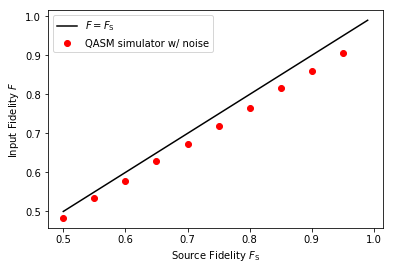

In [89]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F = F_\mathrm{S}$")
plt.plot(source_fidelities, input_fidelities_noise, 'ro', label='QASM simulator w/ noise')
plt.legend()
plt.xlabel('Source Fidelity $F_\mathrm{S}$')
plt.ylabel("Input Fidelity $F$");

For all source fidelities $F_\mathrm{S}$ we observe from the simulation results that the corresponding input fidelity $F$ is smaller than $F_\mathrm{S}$.

Besides the magnitude of the initial fidelity, another crucial requirement for the functionality of the BBPSSW protocol is that the input states have Werner form $W_F$. To see how well this is achieved in the noisy simulation, we calculate the fidelities between the generated input states `simulated_initial_states` and the corresponding Werner states $W_F$ and store them in the list `fidelities_Werner`:

In [90]:
# empty list to store fidelities
fidelities_Werner = []

for jj, state in enumerate(simulated_initial_states):
    # calculate state fidelity
    fidelity = state_fidelity(state, Werner_state(input_fidelities_noise[jj]))
    
    # add fidelity to list
    fidelities_Werner.append(fidelity)

One can plot the fidelities `fidelities_Werner` against the source fidelities $F_\mathrm{S}$ and see that Werner states can be initialized with fidelities of 99 % and more:

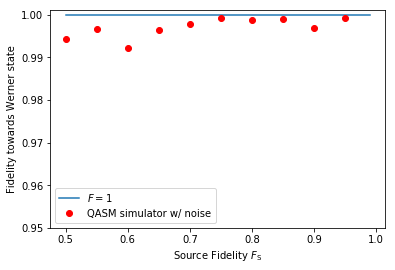

In [91]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, np.ones(len(F_in)), label = "$F = 1$")
plt.plot(source_fidelities, fidelities_Werner, 'ro', label='QASM simulator w/ noise')
plt.legend()
plt.xlabel('Source Fidelity $F_\mathrm{S}$')
plt.ylabel('Fidelity towards Werner state')
plt.ylim(0.95, 1.001);

To summarize, we showed in this noisy simulation that after the initialization procedure through the quantum circuits `source_circ` and `twirl_circ` a Werner state $W_F$ can be generated but with a fidelity $F$ that is smaller than the fidelity $F_\mathrm{S}$ of the original source state.

### 4.3.2 Entanglement Purification in the Presence of Noise

In Sec. 3.2.1 we defined the function `execute_purification`. To perform a noisy simulation of the BBPSSW protocol on the QASM simulator, we can simply pass the additional parameters `noise_model` and `coupling_map` to this function, which will then eventually be passed to the Qiskit function `execute`. 

Again we average over $N=100$ runs for all source fidelities defined in `source_fidelities` and store the output fidelities in the list `output_fidelities_noise`:

In [92]:
runs = 100
output_fidelities_noise = []

for jj, fidelity in enumerate(source_fidelities):
    fitted_states = []
    for ii in range(runs):
        random_idx = np.random.randint(12)
        
        # execute circuits and reconstruct density matrix
        job_dict = execute_purification(fidelity, random_idx, backend_QASM, shots=512, noise_model=noise_model, 
                                        coupling_map=coupling_map)
        rho_fit = rho_from_dict(job_dict, cond_tomo=True)
        fitted_states.append(rho_fit)
        
    rho_average = sum(fitted_states)/runs
    # calculate fidelity and add to list
    output_fidelities_noise.append(state_fidelity(rho_average, phi_plus))
    
    print(str(jj+1) + "/" + str(len(input_fidelities)) + " experiments done.")

1/10 experiments done.
2/10 experiments done.
3/10 experiments done.
4/10 experiments done.
5/10 experiments done.
6/10 experiments done.
7/10 experiments done.
8/10 experiments done.
9/10 experiments done.
10/10 experiments done.


Now, let's see how good the purification worked if we include realistic noise parameters in the simulation. Therefore we plot the output fidelities `output_fidelities_noise` as a function of the input fidelities `input_fidelities_noise`:

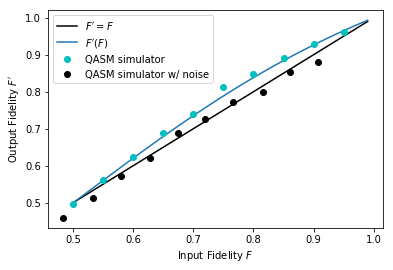

In [93]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.plot(input_fidelities, output_fidelities, 'co', label='QASM simulator')
plt.plot(input_fidelities_noise, output_fidelities_noise, 'ko', label='QASM simulator w/ noise')
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

Due to the presence of noise, the output fidelity (black) is smaller compared to the case of unitary time evolution, which we studied in Sec. 3.2.2. 

We can see that the output fidelity is not as high as in the case of unitary time evolution, which is due to noise. Nevertheless, for fidelities around 0.7 to 0.8, where the increase in fidelity is the largest, one can observe to still gain some fidelity and therefore, one could expect to purifiy entanglement as well on a real device.

This will be tried in the next section.

# Part V: Entanglement Purification on a Real IBM Q Device
***

In this last part of the tutorial, we will run the BBPSSW protocol for entanglement purification on a real IBM Q device using the IBM Q Experience.

The first section explains the necessary details when using the IBM Q Experience. Then we proceed as in the noisy simulation, i.e. we first determine the true input fidelity into the purification protocol and then carry out the complete BBPSSW protocol.

## 5.1 IBM Q Experience

We have already defined the functions `execute_initialization` and `execute_purification` in such a way that we can simply pass the real IBM Q device as the target backend to execute the tomography circuits on it. The reason for this is that the Qiskit function `execute` itself sends a job to a real IBM Q device when this is selected as the backend.

Furthermore, we have already defined the real device `ibmqx2` as the backend `Backend_IBMQ`, so we are basically ready to execute our quantum circuits on the `ibmqx2` machine.

When working with real IBM Q devices via the IBM Q Experience, there are two points to consider when performing the entanglement purification experiment as in the previous sections. On the one hand we have to take into account a certain waiting time until the execution of a job and on the other hand we can only send a limited number of jobs to a real device. These two points will be explained in the next two subsections.

### 5.1.1 Device Queue, Job Status, and Job Monitor

We have already mentioned that a real device usually has a queue of pending jobs from other users. This means that, in addition to the actual execution time of a quantum circuit, the user must also wait until all pending jobs in the queue have been executed. A job has run successfully when it could be transmitted to the real device, passed the queue, and the quantum circuit could finally be executed. Only then can we obtain the results using the method `results` and perform all subsequent steps to reconstruct a density matrix.

This is exactly why we store the job object itself in a dictionary in the functions `execute_initialization` and `execute_purification`, so that we can retrieve the results at a later time when the job has been executed.

The current status of a job can be determined using the `status` method of the job class. Possible statuses are e.g. that the job is initialized, queued, actively running or done.

Qiskit also offers the possibility to continuously monitor a job with the function `job_monitor`:

In [94]:
from qiskit.tools.monitor import job_monitor

However, note that when using the `job_monitor` function, the notebook kernel remains busy until a job has been executed (or aborted for some reason). Since a job sent to a real device may be queued for a long period of time (up to hours or even days, depending on the workload of the device), the job monitor should be used carefully.

The number of pending jobs on an IBM Q device can be checked either on your IBM Q Experience - Dashboard (https://quantum-computing.ibm.com/) or with a Qiskit Jupyter tool `backend_overview`. For this we also import the Jupyter Tools:

In [95]:
import qiskit.tools.jupyter

This gives us a good overview of all IBM Q devices available to us:

In [96]:
%qiskit_backend_overview

### 5.1.2 Personal Credits

The IBM Q Experience regulates the use of real devices with the help of a credit system. This means that an execution on a real device costs a certain number of credits and after a job has been executed, the used credits are replenished. The number of credits that an execution actually costs depends, for example, on the number of experiment shots and the size of the quantum circuits to be executed.

As a private user you have a limited number of credits and therefore you can only send a maximum number of jobs to a real device. 

Remember that we need to execute a series of $N$ runs to implement the twirl operation, which on average creates a Werner state of $W_F$,

$$
W_F \approx \frac{1}{N} \sum_{n=1}^N \rho_n,
$$

where $\rho_n$ denotes the state after the random bilateral rotation in run $n$ which can be obtained by executing the function `execute_initialization`. And we must also execute this series of $N$ runs to determine the average output state $\rho'_{F'}$ of the BBPSSW protocol,

$$
\rho'_{F'} \approx \frac{1}{N} \sum_{n=1}^{N} \rho_n',
$$

where $\rho_n'$ now denotes the state of the control qubits after the application of the BBPSSW protocol in the execution run $n$, obtained by executing the function `execute_purification`. 

To make this averaging process work, we have chosen $N=100$ runs. If we select 1024 shots per experiment, the execution of all tomography circuits through `execute_initialization` or `execute_purification` in one job costs 3 credits. This means that we would need 300 credits to send all $N$ runs to the real device.

As a private user you usually don't have that many credits. (In our case, for example, it is 15 credits.) The entire experiments must therefore be divided into smaller batches, which are then sent separately to the device and executed there.

Furthermore, we want to reduce the number of runs $N$ as much as possible in order to keep the execution time as short as possible. To reduce the number of necessary runs, we will adjust the averaging procedure to obtain a Werner state $W_F$ or the final state $\rho'_{F'}$. Instead of chosing randomly from the set of bilateral rotations, which would be the only way to go in a quantum communication network, we will apply each element of the set once to theoretically obtain an exact Werner state,

Instead of randomly choosing from the set of bilateral rotations $\{U_i\}$, which would be the only practical possibility in a quantum communication network, we will use each element of the set $\{U_i\}$ once to theoretically obtain an exact Werner state at the beginning,

$$
W_F = \frac{1}{12} \sum_{i=1}^{12} U_i^\dagger \rho_\textrm{S} U_i,
$$

where $\rho_\textrm{S}$ is the source state before the application of the twirl. So now we only have to execute 12 jobs to generate a Werner state on average as input for the purification protocol.

In this tutorial we divide these 12 jobs into batches of 4. We then send only one batch at a time to the device and wait until the experiments have been completed, so that there are always enough credits available to execute all jobs of a batch:

| Batch #  | Bilateral Rotations $i$  | Num. of Credits  |
|:-:|:-:|:-:|
| 1  |  1 - 4 | 12  | 
| 2  |  5 - 8 | 12  |
| 3  |  9 - 12 | 12  |


When all batches have been successfully executed, we can finally follow the procedures in **Part III** and **Part IV** to reconstruct the density matrices $W_F$ and $\rho'_{F'}$ from the execution results with our predefined function `rho_from_dict`.

In case you have a different number of credits available, you will see that you can easily adapt the following implementation to your own case.

## 5.2 Initial State and Initial Fidelity

Due to imperfections in the real device, the actual input fidelity $F$ to the BBPSSW protocol is less than the source fidelity $F_\textrm{S}$ (cf. the noisy simulation and the plot in **Sec. 4.3.1**). As in the case of the noisy simulation, we must therefore first determine the actual input fidelity to the BBPSSW protocol.

In the previous section, we explained why we cannot run the BBPSSW protocol on a real device exactly as we did in the simulations. As a private user you have a limited number of credits and we therefore only run the BBPSSW protocol on the real device for a single source fidelity of $F_\textrm{S}=0.9$:

In [97]:
F_source = 0.9

To execute the quantum circuits for the initialization of a Werner state $W_F$, we can use the function `execute_initialization` again. Each execution of this function returns a job dictionary and we store the dictionary of each run $i$ in a list `initialization_jobs`:

In [98]:
initialization_jobs = []

We can use the list elements later to retrieve the job results when the execution of the corresponding quantum circuits is complete.

So let's start with the execution of the first batch on the IBM Q device `ibmqx2`:

In [99]:
for ii in range(0, 4):
    job_dict = execute_initialization(F_source, ii, backend_IBMQ, shots=1024)
    initialization_jobs.append(job_dict)

Remember: Each element of this batch now consists of the tomography circuits belonging to the quantum circuit which first generates the source state $\rho_\textrm{S}$ and then implements the bilateral rotation $U_i$. And the whole thing is done for the indices $i \in \{1, 2, 3, 4\}$.

After running the above cell, we can check the status of each of the four jobs using the method `status`. E.g. for the first entry in the list `initialization_jobs`:

In [100]:
initialization_jobs[0]["job"].status()

<JobStatus.QUEUED: 'job is queued'>

We have also mentioned another method to continuously monitor the status of a job by using the function `job_monitor`. We will do this for the latest job, i.e. the last entry in `initialization_jobs`, but remember that the kernel will be busy until the job is finished (or an error has occurred):

In [101]:
job_monitor(initialization_jobs[-1]["job"])

Job Status: job has successfully run


If the job was successfully executed, i.e. no error occurred and the job was not canceled, the output of the above cell should print `Job Status: job has successfully run`.

If this is the case, we can the start the execution of the second batch by simpy changing the indices of the bilateral rotations to $i \in \{5,6,7,8\}$:

In [102]:
for ii in range(4, 8):
    job_dict = execute_initialization(F_source, ii, backend_IBMQ, shots=1024)
    initialization_jobs.append(job_dict)

Here, too, we use the job monitor to watch the status of the latest job:

In [103]:
job_monitor(initialization_jobs[-1]["job"])

Job Status: job has successfully run


If this job has also run successfully, we can execute the third and last batch for the indices $i \in \{9,10,11,12\}$:

In [104]:
for ii in range(8, 12):
    job_dict = execute_initialization(F_source, ii, backend_IBMQ, shots=1024)
    initialization_jobs.append(job_dict)

We monitor the status of the job that was last sent again:

In [105]:
job_monitor(initialization_jobs[-1]["job"])

Job Status: job has successfully run


To make sure that all jobs have actually run successfully, you can, for example, check the status of all jobs that we have now executed on the real IBM Q device:

In [106]:
for i, entry in enumerate(initialization_jobs):
    print('i = ' + str(i+1) + ': ' + str(entry["job"].status()))

i = 1: JobStatus.DONE
i = 2: JobStatus.DONE
i = 3: JobStatus.DONE
i = 4: JobStatus.DONE
i = 5: JobStatus.DONE
i = 6: JobStatus.DONE
i = 7: JobStatus.DONE
i = 8: JobStatus.DONE
i = 9: JobStatus.DONE
i = 10: JobStatus.DONE
i = 11: JobStatus.DONE
i = 12: JobStatus.DONE


If the status of all jobs is `DONE`, we can now reconstruct the quantum state of the control qubits.

In the noisy simulation (**Sec. 4.3.1**) we did this for each execution run with the previously defined function `rho_from_dict`, to which we passed the job dictionary of this run and set the value of the input parameter `cond_tomo=False`. (We perform regular quantum state tomography after initialization.)

Here, in the case of a real device, we can use exactly the same procedure to reconstruct the density matrices of the control qubits using the function `rho_from_dict`:

In [107]:
experimental_initial_states = []

for entry in initialization_jobs:
    rho_fit = rho_from_dict(entry, cond_tomo=False)
    experimental_initial_states.append(rho_fit)

We store the reconstructed initial state of each run $i$ in the list `experimental_initial_states` and then calculate the average:

In [108]:
rho_average = sum(experimental_initial_states)/12

The state `rho_average` should now be close to a Werner state $W_F$ to be useful as an input state for the BBPSSW protocol. To check this, we must first calculate the fidelity $F$ towards the Bell state $|\Psi^-\rangle$:

In [109]:
experimental_input_fidelity = state_fidelity(rho_average, psi_minus)

print('Source fidelity =', F_source)
print('Experimental input fidelity = {:.4f}'.format(experimental_input_fidelity))

Source fidelity = 0.9
Experimental input fidelity = 0.6385


This fidelity now corresponds to the actual initial fidelity, if a real IBM Q device is used as backend and is therefore called `experimental_input_fidelity`.

(For comparison: In experiments to test the tutorial we got fidelities `experimental_input_fidelity` of about 66 % using the IBM Q device `ibmqx2`.)

As we could expect from the noisy simulation, the fidelity `experimental_input_fidelity` is smaller than the source fidelity `F_source`, i.e.:

$$
F < F_\textrm{S}.
$$

We can now calculate the fidelity of the state `rho_average` towards the Werner state $W_F$ (where $F$ is now the `experimental_input_fidelity`):

In [110]:
fidelity_Werner = state_fidelity(rho_average, Werner_state(experimental_input_fidelity))

print('Fidelity towards Werner state = {:.4f}'.format(fidelity_Werner))

Fidelity towards Werner state = 0.9509


(For comparison: In experiments to test the tutorial we got fidelities `fidelity_Werner` of about 95 % using the IBM Q device `ibmqx2`.)

The results we obtained from the real IBM Q device `ibmqx2` can now be compared with the results of the noisy simulation:

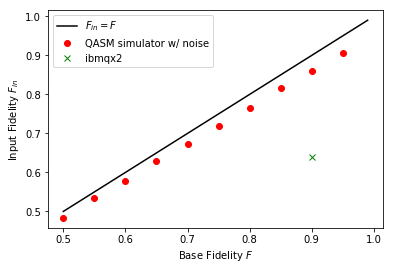

In [111]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F_{in} = F$")
plt.plot(source_fidelities, input_fidelities_noise, 'ro', label='QASM simulator w/ noise')
plt.plot(F_source, experimental_input_fidelity, 'gx', label=backend_IBMQ.name())
plt.legend()
plt.xlabel('Base Fidelity $F$')
plt.ylabel("Input Fidelity $F_{in}$");

Probably the experimentally observed input fidelity on the device `ibmqx2` is smaller than that of the noisy simulation. There may be various reasons why the results of the simulation and the use of the real device differ. For example, we used a very simple noise model for the simulation, which most likely does not take into account all the effects that lead to errors in the computation on the real device.

An analysis of how good the simulation is should not be part of this tutorial. The focus of this section is basically to execute the quantum circuits correctly on a real IBM Q device using the IBM Q Experience.

Now that we have obtained an experimental value for the input fidelity $F$, in the last step of this tutorial we will run the complete BBPSSW protocol on the `ibmqx2` device.

## 5.3 Execution of the BBPSSW Protocol on a Real Device

The execution of the complete purification experiment is similar to the steps in the previous section regarding the splitting of all necessary jobs into smaller batches. This is again due to the limited number of credits.

To run the BBPSSW protocol on a real IBM Q device, we will use our function `execute_purification` and simply pass the IBM Q device `ibmqx2` as the target backend.

We use each element of the set $\{U_i\}$ once again to implement an exact twirl. The output state of the control qubits $\rho'_{F'}$ after to the BBPSSW protocol will then be the following average

$$
\rho'_{F'} = \frac{1}{12} \sum_{i=1}^{N} \rho_i',
$$

where $\rho_i'$ is the control qubit state if the bilateral rotation $U_i$ was applied during the initialization process.

This time we store the jobs of each run $i$ in the list `purification_jobs`:

In [112]:
purification_jobs = []

We start with the execution of the first batch on the IBM Q device `ibmqx2`:

In [113]:
for ii in range(0, 4):
    job_dict = execute_purification(F_source, ii, backend_IBMQ, shots=512)
    purification_jobs.append(job_dict)

Remember once again: Each element of this batch now consists of the tomography circuits to the quantum circuit, which uses the bilateral rotation $U_i$ in the twirl and then implements the entire BBPSSW protocol. And the whole thing is done for the indices $i \in \{1, 2, 3, 4\}$.

Here, too, we use the job monitor to watch the status of the latest job:

In [114]:
job_monitor(purification_jobs[-1]["job"])

Job Status: job has successfully run


If the job has successfully run, we can the start the execution of the second batch by simpy changing the indices of the bilateral rotations to $i \in \{5,6,7,8\}$:

In [115]:
for ii in range(4, 8):
    job_dict = execute_purification(F_source, ii, backend_IBMQ, shots=512)
    purification_jobs.append(job_dict)

In [116]:
job_monitor(purification_jobs[-1]["job"])

Job Status: job has successfully run


And if the latest job of the second batch has successfully run, the third batch can be sent to the device using the indices $i \in \{9,10,11,12\}$:

In [117]:
for ii in range(8, 12):
    job_dict = execute_purification(F_source, ii, backend_IBMQ, shots=512)
    purification_jobs.append(job_dict)

In [118]:
job_monitor(purification_jobs[-1]["job"])

Job Status: job has successfully run


To ensure that all jobs have been successfully executed, we will again check the status of all jobs that we have just executed on the real IBM Q device:

In [119]:
for i, entry in enumerate(purification_jobs):
    print('i = ' + str(i+1) + ': ' + str(entry["job"].status()))

i = 1: JobStatus.DONE
i = 2: JobStatus.DONE
i = 3: JobStatus.DONE
i = 4: JobStatus.DONE
i = 5: JobStatus.DONE
i = 6: JobStatus.DONE
i = 7: JobStatus.DONE
i = 8: JobStatus.DONE
i = 9: JobStatus.DONE
i = 10: JobStatus.DONE
i = 11: JobStatus.DONE
i = 12: JobStatus.DONE


When the status of all jobs is `DONE`, we can continue to reconstruct the state of the control qubits using conditional quantum state tomography. Again we follow the steps of the noisy simulation (**Sec. 4.3.2**) and do this  for each execution run with the previously defined function `rho_from_dict`, to which we pass the job dictionary of this run and set the value of the input parameter `cond_tomo=True`:

In [120]:
experimental_output_states = []

for entry in purification_jobs:
    rho_fit = rho_from_dict(entry, cond_tomo=True)
    experimental_output_states.append(rho_fit)

Here we store the reconstructed output state of each run $i$ in the list `experimental_output_states`. We then calculate the average of all reconstructed states to obtain $\rho'_{F'}$:

In [121]:
rho_average = sum(experimental_output_states)/12

Now that we have the state $\rho'_{F'}$, we are finally able to calculate the output fidelity $F'$ after executing the BBPSSW protocol on the real device,

$$
F' = \langle \Phi^+ | \rho'_{F'}| \Phi^+ \rangle,
$$

and compare it to the experimental input fidelity $F$:

In [122]:
experimental_output_fidelity = state_fidelity(rho_average, phi_plus)

print('Source fidelity =', F_source)
print('Experimental input fidelity = {:.4f}'.format(experimental_input_fidelity))
print('Theoretical output fidelity = {:.4f}'.format(output_fidelity(experimental_input_fidelity)))
print('Experimental output fidelity = {:.4f}'.format(experimental_output_fidelity))

Source fidelity = 0.9
Experimental input fidelity = 0.6385
Theoretical output fidelity = 0.6658
Experimental output fidelity = 0.6998


(For comparison: In experiments to test the tutorial we got output fidelities `experimental_output_fidelity` of about 66 - 68 % using the IBM Q device `ibmqx2`.)

If the current errors in the system are not too large, the experimental output fidelity may be greater than the input fidelity. However, we will not be able to make any concrete statements about the result. This would require a much more thorough analysis, which cannot be part of this tutorial. For example, to compare input and output fidelity, two quantities observed in two different experiments, it would be necessary to prove that the experimental conditions were the same in both cases. Also a fundamental, detailed error analysis cannot be omitted.

Nevertheless, at the end we summarize all the results we have received in this tutorial:

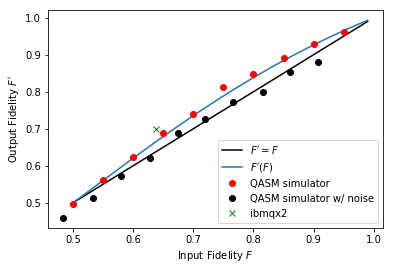

In [123]:
F_in = np.arange(0.5, 1.0, 0.01)
plt.plot(F_in, F_in, 'k', label = "$F' = F$")
plt.plot(F_in, output_fidelity(F_in), label = "$F'(F)$")
plt.plot(input_fidelities, output_fidelities, 'ro', label='QASM simulator')
plt.plot(input_fidelities_noise, output_fidelities_noise, 'ko', label='QASM simulator w/ noise')
plt.plot(experimental_input_fidelity, experimental_output_fidelity, 'gx', label=backend_IBMQ.name())
plt.legend()
plt.xlabel('Input Fidelity $F$')
plt.ylabel("Output Fidelity $F'$");

When we compare the results of the `ibmqx2` machine and the noisy simulation, we see a good agreement for the value of the output fidelity $F'$. However, we have already seen that the simulator significantly overestimates the value for the actual initial fidelity $F$. The errors that come from the part of the circuit that belongs exclusively to the BBPSSW protocol, i.e. gate errors in the circuit `purification_circ` and subsequent measurement errors, are therefore probably underestimated by the noise model used here.

# Part VI: Conclusion and Further Ideas

In this tutorial we showed how to use the IBM framework Qiskit and the online platform IBM Q Experience for quantum information processing, using the BBPSSW protocol for entanglement purification as an example.

The quantum circuit for the BBPSSW protocol consists of common single-qubit and two-qubit gates and we have explained in detail how this circuit is constructed in Qiskit. Furthermore, we have demonstrated how to use a library integrated in Qiskit to perform conditional quantum state tomography, which is also required in the BBPSSW protocol.

Quantum circuits in Qiskit can be executed either on a simulator or on real IBM Q devices and we have shown how to use these two backends respectively. When using the simulator, we also explained how simple noise models can be created and integrated into the simulation.

There are (at least) two possible topics that could usefully extend this tutorial. On the one hand, there are possibilities to improve the execution on real devices, and on the other hand, there are other protocols for entanglement purification in addition to the BBPSSW protocol.

Some possibilities that could improve the quality of execution on a real device are:

* **Error mitigation through calibration circuits**  
The Qiskit element Ignis provides noise mitigation functions through specific calibration routines. The use of these functions could therefore lead to a better performance of the execution on the real device and thus to a more significant increase in the output fidelity $F'$.


* **Circuit optimization with internal compiler**  
A quantum circuit must be mapped to the physical layout of a real device, i.e. the coupling of the individual qubits with each other and the available set quantum gates is taken into account. This is done via a compiler and the result is a compiled quantum circuit which is actually executed on the real device. The Qiskit compiler knows four optimization levels and you can use this possibility to reduce the length of the compiled circuit, i.e. the number of operations required, and thus suppress the effects of errors.


* **Circuit optimization with external compiler**  
Another possibility is the use of external compilers, such as t|ket⟩™, to optimize quantum circuits. In addition, one could compare the results of different compilers with each other.

As already mentioned, the BBPSSW protocol is one of many for entanglement purification. Some of these protocols work very similarly and differ only in the bilateral two-qubit interaction that Alice and Bob apply locally to their qubits (see e.g. [5]). It is straightforward to implement such a protocol by simply changing the gates that make up the circuit `purification_circ`.

But there are also protocols that work with three input pairs $\rho_\textrm{S}$, for example, and require a specific measurement outcome of two of these pairs for successful purification (see e.g. [6]). In order to implement such a protocol in Qiskit according to the procedure presented in this tutorial, one would also have to adapt the creation of the ancilla tomography circuits and change the function `purification_shots` so that the conditions for a successful purification are fulfilled.

Finally, we would like to emphasize that by providing these ideas, we hope to encourage other users to continue learning with this tutorial notebook by trying out the implementation of the ideas.


## References
***

[1] C. H. Bennett, H. J. Bernstein, S. Popescu, and B. Schumacher, *Concentrating partial entanglement by local operations*, Phys. Rev. A **53**, 2046 (1996).

[2a] C. H. Bennett, G. Brassard, C. Crépeau, R. Jozsa, A. Peres, and W. K. Wootters, *Teleporting an unknown quantum state via dual classical and Einstein-Podolsky-Rosen channels*, Phys. Rev. Lett. **70**, 1895 (1993).

[2b] A. K. Ekert, *Quantum cryptography based on Bell’s theorem*, Phys. Rev. Lett. **67**, 661 (1991).

[2c] H.-J. Briegel, W. Dür, J. I. Cirac, and P. Zoller, *Quantum Repeaters: The Role of Imperfect Local Operations in Quantum Communication*, Phys. Rev. Lett. **81**, 5932 (1998).

[2] C. H. Bennett, D. P. DiVincenzo, J. A. Smolin, and W. K. Wootters, *Mixed-state entanglement
and quantum error correction*, Phys. Rev. A **54**, 3824 (1996).

[3] https://github.com/Qiskit/qiskit-tutorials/blob/master/qiskit/ignis/state-tomography.ipynb (from 2019-05-16)

[4] https://github.com/Qiskit/qiskit-iqx-tutorials/blob/5c18c22465d19b22ca19a915518f051de78ba4bc/qiskit/fundamentals/3_the_ibmq_account.ipynb (from 2019-11-04)

[5] A. Auer and G. Burkard, *Entanglement Purification with the Exchange Interaction*, Phys. Rev. A **90**, 022320 (2014).

[6] K. Maruyama and F. Nori, Phys. Rev. A **78**, 022312 (2008).

In [133]:
%qiskit_version_table